In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
#from sklearn.metrics import roc_curve, auc_curve
#confussion_matrix,
#X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.2, random_state=126)



In [2]:
df = pd.read_csv('premierleague.csv', index_col='Unnamed: 0')
df

,link_match,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,home_fouls_conceded,...,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away
0,https://www.premierleague.com/match/7186,10/11,2010-11-01,Blackpool,West Bromwich Albion,2-1,1-0,15.0,8.0,16.0,...,20.0,584.9,1.6,1.44,1.67,-2.0,0.33,0.78,-4.0,55.6
1,https://www.premierleague.com/match/7404,10/11,2011-04-11,Liverpool,Manchester City,3-0,3-0,16.0,6.0,6.0,...,22.0,681.4,2.0,1.61,0.87,23.0,0.87,0.32,17.0,60.2
2,https://www.premierleague.com/match/7255,10/11,2010-12-13,Manchester United,Arsenal,1-0,1-0,26.0,5.0,9.0,...,21.2,748.0,1.8,2.12,1.12,16.0,0.94,0.38,9.0,66.7
3,https://www.premierleague.com/match/7126,10/11,2010-09-13,Stoke City,Aston Villa,2-1,0-1,26.0,8.0,12.0,...,25.0,567.3,2.0,1.33,2.00,-2.0,1.00,1.00,0.0,66.7
4,https://www.premierleague.com/match/7350,10/11,2011-02-14,Fulham,Chelsea,0-0,0-0,50.0,4.0,11.0,...,19.4,728.6,1.4,1.84,0.88,24.0,0.84,0.48,9.0,58.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,https://www.premierleague.com/match/59113,20/21,2021-02-03,Liverpool,Brighton and Hove Albion,0-1,0-0,15.0,5.0,12.0,...,16.8,651.0,1.5,1.10,1.38,-6.0,0.52,0.67,-3.0,33.3
4066,https://www.premierleague.com/match/59177,20/21,2021-03-03,Burnley,Leicester City,1-1,1-1,13.0,5.0,6.0,...,17.7,679.0,1.8,1.73,1.15,15.0,0.77,0.58,5.0,62.8
4067,https://www.premierleague.com/match/59178,20/21,2021-03-03,Crystal Palace,Manchester United,0-0,0-0,25.0,4.0,4.0,...,14.9,742.6,1.6,2.04,1.23,21.0,0.85,0.69,4.0,64.1
4068,https://www.premierleague.com/match/59182,20/21,2021-03-03,Sheffield United,Aston Villa,1-0,1-0,47.0,2.0,13.0,...,13.3,587.0,1.7,1.58,1.08,12.0,0.67,0.42,6.0,54.2


In [3]:
df.columns.to_list()

['link_match',
 'season',
 'date',
 'home_team',
 'away_team',
 'result_full',
 'result_ht',
 'home_clearances',
 'home_corners',
 'home_fouls_conceded',
 'home_offsides',
 'home_passes',
 'home_possession',
 'home_red_cards',
 'home_shots',
 'home_shots_on_target',
 'home_tackles',
 'home_touches',
 'home_yellow_cards',
 'away_clearances',
 'away_corners',
 'away_fouls_conceded',
 'away_offsides',
 'away_passes',
 'away_possession',
 'away_red_cards',
 'away_shots',
 'away_shots_on_target',
 'away_tackles',
 'away_touches',
 'away_yellow_cards',
 'goal_home_ft',
 'goal_away_ft',
 'sg_match_ft',
 'goal_home_ht',
 'goal_away_ht',
 'sg_match_ht',
 'clearances_avg_H',
 'corners_avg_H',
 'fouls_conceded_avg_H',
 'offsides_avg_H',
 'passes_avg_H',
 'possession_avg_H',
 'red_cards_avg_H',
 'shots_avg_H',
 'shots_on_target_avg_H',
 'tackles_avg_H',
 'touches_avg_H',
 'yellow_cards_avg_H',
 'goals_scored_ft_avg_H',
 'goals_conced_ft_avg_H',
 'sg_match_ft_acum_H',
 'goals_scored_ht_avg_H',
 'go

In [4]:
df.drop(['link_match'], axis=1, inplace=True)

In [5]:
#seperate goals to create a serie for W/L/D to use it later in the predection:
df[['home_Goals', 'away_Goals']] = df['result_full'].str.split('-', expand = True)
df.head()

,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,home_fouls_conceded,home_offsides,...,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away,home_Goals,away_Goals
0,10/11,2010-11-01,Blackpool,West Bromwich Albion,2-1,1-0,15.0,8.0,16.0,2.0,...,1.6,1.44,1.67,-2.0,0.33,0.78,-4.0,55.6,2,1
1,10/11,2011-04-11,Liverpool,Manchester City,3-0,3-0,16.0,6.0,6.0,5.0,...,2.0,1.61,0.87,23.0,0.87,0.32,17.0,60.2,3,0
2,10/11,2010-12-13,Manchester United,Arsenal,1-0,1-0,26.0,5.0,9.0,3.0,...,1.8,2.12,1.12,16.0,0.94,0.38,9.0,66.7,1,0
3,10/11,2010-09-13,Stoke City,Aston Villa,2-1,0-1,26.0,8.0,12.0,2.0,...,2.0,1.33,2.00,-2.0,1.00,1.00,0.0,66.7,2,1
4,10/11,2011-02-14,Fulham,Chelsea,0-0,0-0,50.0,4.0,11.0,1.0,...,1.4,1.84,0.88,24.0,0.84,0.48,9.0,58.7,0,0


In [6]:
df = df.astype({'home_Goals': int, 'away_Goals': int})

In [7]:
df[['home_Goals', 'away_Goals']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4070 entries, 0 to 4069
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   home_Goals  4070 non-null   int64
 1   away_Goals  4070 non-null   int64
dtypes: int64(2)
memory usage: 95.4 KB


In [8]:
df['GoalDifference'] = df['home_Goals'] - df['away_Goals']
df.head()
#note: remove (-) from the 'GoalDifference' column result to avoid miss understanding in the prediction!

,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,home_fouls_conceded,home_offsides,...,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away,home_Goals,away_Goals,GoalDifference
0,10/11,2010-11-01,Blackpool,West Bromwich Albion,2-1,1-0,15.0,8.0,16.0,2.0,...,1.44,1.67,-2.0,0.33,0.78,-4.0,55.6,2,1,1
1,10/11,2011-04-11,Liverpool,Manchester City,3-0,3-0,16.0,6.0,6.0,5.0,...,1.61,0.87,23.0,0.87,0.32,17.0,60.2,3,0,3
2,10/11,2010-12-13,Manchester United,Arsenal,1-0,1-0,26.0,5.0,9.0,3.0,...,2.12,1.12,16.0,0.94,0.38,9.0,66.7,1,0,1
3,10/11,2010-09-13,Stoke City,Aston Villa,2-1,0-1,26.0,8.0,12.0,2.0,...,1.33,2.00,-2.0,1.00,1.00,0.0,66.7,2,1,1
4,10/11,2011-02-14,Fulham,Chelsea,0-0,0-0,50.0,4.0,11.0,1.0,...,1.84,0.88,24.0,0.84,0.48,9.0,58.7,0,0,0


In [9]:
df['points_home'] = 0
df['points_away'] = 0
# idk what is df.index!
for i in df.index:
    if df['home_Goals'][i] > df['away_Goals'][i]:
        df['points_home'][i] += 3
       
    elif df['home_Goals'][i]<df['away_Goals'][i]:
        df['points_away'][i]+=3
      
    else:
        df['points_home'][i]+=1
        df['points_away'][i]+=1
df

/var/folders/_g/ks06ypzd0b77vz99vm0j17940000gn/T/ipykernel_7473/2205119011.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['points_home'][i] += 3
/var/folders/_g/ks06ypzd0b77vz99vm0j17940000gn/T/ipykernel_7473/2205119011.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['points_home'][i]+=1
/var/folders/_g/ks06ypzd0b77vz99vm0j17940000gn/T/ipykernel_7473/2205119011.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['po

,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,home_fouls_conceded,home_offsides,...,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away,home_Goals,away_Goals,GoalDifference,points_home,points_away
0,10/11,2010-11-01,Blackpool,West Bromwich Albion,2-1,1-0,15.0,8.0,16.0,2.0,...,-2.0,0.33,0.78,-4.0,55.6,2,1,1,3,0
1,10/11,2011-04-11,Liverpool,Manchester City,3-0,3-0,16.0,6.0,6.0,5.0,...,23.0,0.87,0.32,17.0,60.2,3,0,3,3,0
2,10/11,2010-12-13,Manchester United,Arsenal,1-0,1-0,26.0,5.0,9.0,3.0,...,16.0,0.94,0.38,9.0,66.7,1,0,1,3,0
3,10/11,2010-09-13,Stoke City,Aston Villa,2-1,0-1,26.0,8.0,12.0,2.0,...,-2.0,1.00,1.00,0.0,66.7,2,1,1,3,0
4,10/11,2011-02-14,Fulham,Chelsea,0-0,0-0,50.0,4.0,11.0,1.0,...,24.0,0.84,0.48,9.0,58.7,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,20/21,2021-02-03,Liverpool,Brighton and Hove Albion,0-1,0-0,15.0,5.0,12.0,0.0,...,-6.0,0.52,0.67,-3.0,33.3,0,1,-1,0,3
4066,20/21,2021-03-03,Burnley,Leicester City,1-1,1-1,13.0,5.0,6.0,3.0,...,15.0,0.77,0.58,5.0,62.8,1,1,0,1,1
4067,20/21,2021-03-03,Crystal Palace,Manchester United,0-0,0-0,25.0,4.0,4.0,1.0,...,21.0,0.85,0.69,4.0,64.1,0,0,0,1,1
4068,20/21,2021-03-03,Sheffield United,Aston Villa,1-0,1-0,47.0,2.0,13.0,1.0,...,12.0,0.67,0.42,6.0,54.2,1,0,1,3,0


In [10]:
df.sort_values(by = 'date', inplace= True)
df.head(20)

,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,home_fouls_conceded,home_offsides,...,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away,home_Goals,away_Goals,GoalDifference,points_home,points_away
55,10/11,2010-08-14,Aston Villa,West Ham United,3-0,2-0,24.0,15.0,16.0,1.0,...,NaN,NaN,NaN,NaN,NaN,3,0,3,3,0
57,10/11,2010-08-14,Bolton Wanderers,Fulham,0-0,0-0,54.0,4.0,11.0,5.0,...,NaN,NaN,NaN,NaN,NaN,0,0,0,1,1
58,10/11,2010-08-14,Chelsea,West Bromwich Albion,6-0,2-0,10.0,3.0,12.0,3.0,...,NaN,NaN,NaN,NaN,NaN,6,0,6,3,0
59,10/11,2010-08-14,Sunderland,Birmingham City,2-2,1-0,49.0,3.0,15.0,2.0,...,NaN,NaN,NaN,NaN,NaN,2,2,0,1,1
60,10/11,2010-08-14,Tottenham Hotspur,Manchester City,0-0,0-0,20.0,10.0,13.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0,0,0,1,1
61,10/11,2010-08-14,Wigan Athletic,Blackpool,0-4,0-3,15.0,6.0,8.0,3.0,...,NaN,NaN,NaN,NaN,NaN,0,4,-4,0,3
62,10/11,2010-08-14,Wolverhampton Wanderers,Stoke City,2-1,2-0,46.0,5.0,19.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2,1,1,3,0
56,10/11,2010-08-14,Blackburn Rovers,Everton,1-0,1-0,48.0,1.0,20.0,3.0,...,NaN,NaN,NaN,NaN,NaN,1,0,1,3,0
246,10/11,2010-08-15,Liverpool,Arsenal,1-1,0-0,33.0,9.0,15.0,5.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,1,1
5,10/11,2010-08-16,Manchester United,Newcastle United,3-0,2-0,15.0,5.0,9.0,4.0,...,NaN,NaN,NaN,NaN,NaN,3,0,3,3,0


In [11]:
# create a col to count matches for each season.
matchperday =[]
for i in range(0,4070):
    matchperday.append(i-i+1)

len(matchperday)

4070

In [12]:
df['matchperday'] = matchperday
df.head()
df['matchperday'].info()


<class 'pandas.core.series.Series'>
Int64Index: 4070 entries, 55 to 4007
Series name: matchperday
Non-Null Count  Dtype
--------------  -----
4070 non-null   int64
dtypes: int64(1)
memory usage: 63.6 KB


In [13]:
df.head()

,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,home_fouls_conceded,home_offsides,...,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away,home_Goals,away_Goals,GoalDifference,points_home,points_away,matchperday
55,10/11,2010-08-14,Aston Villa,West Ham United,3-0,2-0,24.0,15.0,16.0,1.0,...,NaN,NaN,NaN,NaN,3,0,3,3,0,1
57,10/11,2010-08-14,Bolton Wanderers,Fulham,0-0,0-0,54.0,4.0,11.0,5.0,...,NaN,NaN,NaN,NaN,0,0,0,1,1,1
58,10/11,2010-08-14,Chelsea,West Bromwich Albion,6-0,2-0,10.0,3.0,12.0,3.0,...,NaN,NaN,NaN,NaN,6,0,6,3,0,1
59,10/11,2010-08-14,Sunderland,Birmingham City,2-2,1-0,49.0,3.0,15.0,2.0,...,NaN,NaN,NaN,NaN,2,2,0,1,1,1
60,10/11,2010-08-14,Tottenham Hotspur,Manchester City,0-0,0-0,20.0,10.0,13.0,1.0,...,NaN,NaN,NaN,NaN,0,0,0,1,1,1


In [14]:
df_home = df.filter(regex='home', axis=1)
df_home.isna().sum()

home_team                     0
home_clearances               0
home_corners                  0
home_fouls_conceded           0
home_offsides                 0
home_passes                   0
home_possession               0
home_red_cards                0
home_shots                    0
home_shots_on_target          0
home_tackles                  0
home_touches                  0
home_yellow_cards             0
goal_home_ft                  0
goal_home_ht                  0
clearances_avg_home         110
corners_avg_home            110
fouls_conceded_avg_home     110
offsides_avg_home           110
passes_avg_home             110
possession_avg_home         110
red_cards_avg_home          110
shots_avg_home              110
shots_on_target_avg_home    110
tackles_avg_home            110
touches_avg_home            110
yellow_cards_avg_home       110
goals_scored_ft_avg_home    110
goals_conced_ft_avg_home    110
sg_match_ft_acum_home       110
goals_scored_ht_avg_home    110
goals_co

In [15]:
#df_home.dropna(axis=1,inplace=True)

In [16]:
df_home.isna().sum()

home_team                     0
home_clearances               0
home_corners                  0
home_fouls_conceded           0
home_offsides                 0
home_passes                   0
home_possession               0
home_red_cards                0
home_shots                    0
home_shots_on_target          0
home_tackles                  0
home_touches                  0
home_yellow_cards             0
goal_home_ft                  0
goal_home_ht                  0
clearances_avg_home         110
corners_avg_home            110
fouls_conceded_avg_home     110
offsides_avg_home           110
passes_avg_home             110
possession_avg_home         110
red_cards_avg_home          110
shots_avg_home              110
shots_on_target_avg_home    110
tackles_avg_home            110
touches_avg_home            110
yellow_cards_avg_home       110
goals_scored_ft_avg_home    110
goals_conced_ft_avg_home    110
sg_match_ft_acum_home       110
goals_scored_ht_avg_home    110
goals_co

In [17]:
home= df_home.join([df.season,df.date,df.matchperday])

In [18]:
home.head()

,home_team,home_clearances,home_corners,home_fouls_conceded,home_offsides,home_passes,home_possession,home_red_cards,home_shots,home_shots_on_target,...,sg_match_ft_acum_home,goals_scored_ht_avg_home,goals_conced_ht_avg_home,sg_match_ht_acum_home,performance_acum_home,home_Goals,points_home,season,date,matchperday
55,Aston Villa,24.0,15.0,16.0,1.0,395.0,56.8,0.0,27.0,5.0,...,NaN,NaN,NaN,NaN,NaN,3,3,10/11,2010-08-14,1
57,Bolton Wanderers,54.0,4.0,11.0,5.0,336.0,46.5,0.0,11.0,5.0,...,NaN,NaN,NaN,NaN,NaN,0,1,10/11,2010-08-14,1
58,Chelsea,10.0,3.0,12.0,3.0,592.0,59.5,0.0,19.0,12.0,...,NaN,NaN,NaN,NaN,NaN,6,3,10/11,2010-08-14,1
59,Sunderland,49.0,3.0,15.0,2.0,304.0,44.1,1.0,9.0,2.0,...,NaN,NaN,NaN,NaN,NaN,2,1,10/11,2010-08-14,1
60,Tottenham Hotspur,20.0,10.0,13.0,1.0,374.0,39.2,0.0,21.0,8.0,...,NaN,NaN,NaN,NaN,NaN,0,1,10/11,2010-08-14,1


In [19]:
hTeams = home.groupby(['season','home_team']).sum()

In [20]:
hTeams.drop('20/21',axis=0,inplace=True)

In [21]:
hTeams.reset_index(inplace=True)

In [22]:
hTeams.rename(columns={'matchperday': 'home_matchperday','home_team':'team_name'}, inplace=True)

In [23]:
hTeams.set_index('season', inplace=True)

In [24]:
hTeams

,team_name,home_clearances,home_corners,home_fouls_conceded,home_offsides,home_passes,home_possession,home_red_cards,home_shots,home_shots_on_target,...,goals_scored_ft_avg_home,goals_conced_ft_avg_home,sg_match_ft_acum_home,goals_scored_ht_avg_home,goals_conced_ht_avg_home,sg_match_ht_acum_home,performance_acum_home,home_Goals,points_home,home_matchperday
season,,,,,,,,,,,,,,,,,,,,,
10/11,Arsenal,432.0,137.0,234.0,61.0,10316.0,1149.5,3.0,350.0,125.0,...,40.33,19.33,369.0,17.47,6.73,208.0,1219.0,33,37,19
10/11,Aston Villa,513.0,122.0,227.0,39.0,7251.0,918.6,1.0,274.0,82.0,...,21.13,30.85,-167.0,11.75,13.51,-53.0,724.2,26,31,19
10/11,Birmingham City,649.0,89.0,209.0,49.0,7316.0,953.8,2.0,229.0,57.0,...,21.60,26.67,-120.0,6.39,7.35,-21.0,709.4,19,26,19
10/11,Blackburn Rovers,711.0,86.0,243.0,50.0,5501.0,771.6,1.0,254.0,69.0,...,20.91,26.45,-124.0,10.21,6.39,45.0,687.4,22,28,19
10/11,Blackpool,777.0,91.0,236.0,47.0,7640.0,974.8,0.0,293.0,83.0,...,28.44,38.48,-196.0,14.27,18.41,-73.0,763.1,30,20,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19/20,Southampton,365.0,98.0,198.0,32.0,8016.0,940.0,4.0,240.0,77.0,...,20.60,36.36,-225.0,7.10,15.31,-123.0,657.2,21,21,19
19/20,Tottenham Hotspur,382.0,110.0,209.0,34.0,9553.0,989.6,2.0,245.0,79.0,...,30.91,25.26,93.0,16.36,14.02,67.0,853.8,36,39,19
19/20,Watford,367.0,82.0,258.0,34.0,6879.0,810.3,2.0,244.0,65.0,...,12.55,32.84,-307.0,6.41,15.89,-134.0,402.5,22,24,19


In [25]:
df_away = df.filter(regex='away', axis=1)

In [26]:
#df_away.dropna(axis=1,inplace=True)

In [27]:
df_away.isna().sum()

away_team                     0
away_clearances               0
away_corners                  0
away_fouls_conceded           0
away_offsides                 0
away_passes                   0
away_possession               0
away_red_cards                0
away_shots                    0
away_shots_on_target          0
away_tackles                  0
away_touches                  0
away_yellow_cards             0
goal_away_ft                  0
goal_away_ht                  0
clearances_avg_away         110
corners_avg_away            110
fouls_conceded_avg_away     110
offsides_avg_away           110
passes_avg_away             110
possession_avg_away         110
red_cards_avg_away          110
shots_avg_away              110
shots_on_target_avg_away    110
tackles_avg_away            110
touches_avg_away            110
yellow_cards_avg_away       110
goals_scored_ft_avg_away    110
goals_conced_ft_avg_away    110
sg_match_ft_acum_away       110
goals_scored_ht_avg_away    110
goals_co

In [28]:
away= df_away.join([df.season,df.date,df.matchperday])

In [29]:
away.head()

,away_team,away_clearances,away_corners,away_fouls_conceded,away_offsides,away_passes,away_possession,away_red_cards,away_shots,away_shots_on_target,...,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away,away_Goals,points_away,season,date,matchperday
55,West Ham United,36.0,7.0,16.0,1.0,313.0,43.2,0.0,14.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0,0,10/11,2010-08-14,1
57,Fulham,52.0,8.0,14.0,3.0,394.0,53.5,0.0,15.0,4.0,...,NaN,NaN,NaN,NaN,NaN,0,1,10/11,2010-08-14,1
58,West Bromwich Albion,24.0,2.0,10.0,1.0,394.0,40.5,0.0,11.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0,0,10/11,2010-08-14,1
59,Birmingham City,39.0,5.0,10.0,1.0,386.0,55.9,0.0,13.0,6.0,...,NaN,NaN,NaN,NaN,NaN,2,1,10/11,2010-08-14,1
60,Manchester City,29.0,3.0,16.0,1.0,626.0,60.8,0.0,14.0,2.0,...,NaN,NaN,NaN,NaN,NaN,0,1,10/11,2010-08-14,1


In [30]:
aTeams = away.groupby(['season','away_team']).sum()

In [31]:
aTeams

away_clearances  away_corners  \
season away_team                                                
10/11  Arsenal                            645.0         115.0   
       Aston Villa                        603.0         108.0   
       Birmingham City                    612.0          61.0   
       Blackburn Rovers                   810.0          87.0   
       Blackpool                          839.0          92.0   
...                                         ...           ...   
20/21  Southampton                        241.0          57.0   
       Tottenham Hotspur                  249.0          45.0   
       West Bromwich Albion               309.0          24.0   
       West Ham United                    263.0          53.0   
       Wolverhampton Wanderers            306.0          63.0   

                                away_fouls_conceded  away_offsides  \
season away_team                                                     
10/11  Arsenal                                219.0           32.0   
       Aston Villa                            239.0           53.0   
       Birmingham City                        226.0           42.0   
       Blackburn Rovers                       255.0           37.0   
       Blackpool                              204.0           50.0   
...                                             ...            ...   
20/21  Southampton                            162.0           25.0   
       Tottenham Hotspur                      123.0           14.0   
       West Bromwich Albion                   136.0           29.0   
       West Ham United                        136.0           24.0   
       Wolverhampton Wanderers                152.0           15.0   

                                away_passes  away_possession  away_red_cards  \
season away_team                                                               
10/11  Arsenal                       9834.0           1132.6             3.0   
       Aston Villa                   7360.0            937.6             1.0   
       Birmingham City               6720.0            858.4             1.0   
       Blackburn Rovers              5677.0            802.1             4.0   
       Blackpool                     7473.0            913.1             2.0   
...                                     ...              ...             ...   
20/21  Southampton                   6374.0            740.6             3.0   
       Tottenham Hotspur             5891.0            602.7             0.0   
       West Bromwich Albion          4380.0            484.9             2.0   
       West Ham United               4995.0            518.6             1.0   
       Wolverhampton Wanderers       6360.0            678.5             0.0   

                                away_shots  away_shots_on_target  \
season away_team                                                   
10/11  Arsenal                       304.0                 113.0   
       Aston Villa                   232.0                  83.0   
       Birmingham City               172.0                  64.0   
       Blackburn Rovers              199.0                  66.0   
       Blackpool                     238.0                  78.0   
...                                    ...                   ...   
20/21  Southampton                   131.0                  48.0   
       Tottenham Hotspur             136.0                  46.0   
       West Bromwich Albion          100.0                  34.0   
       West Ham United               158.0                  56.0   
       Wolverhampton Wanderers       142.0                  46.0   

                                away_tackles  ...  goals_scored_ft_avg_away  \
season away_team                              ...                             
10/11  Arsenal                         399.0  ...                     39.79   
       Aston Villa                     428.0  ...                     24.02   
       Birmingham City           

In [32]:
aTeams.drop('20/21',axis=0, inplace=True)

In [33]:
aTeams.reset_index(inplace=True)

In [34]:
aTeams.set_index('season', inplace=True)

In [35]:
aTeams.rename(columns={'matchperday': 'away_matchperday','away_team':'team_name'}, inplace=True)

In [36]:
aTeams.drop(columns ='team_name', axis=1,inplace=True)

In [37]:
aTeams

,away_clearances,away_corners,away_fouls_conceded,away_offsides,away_passes,away_possession,away_red_cards,away_shots,away_shots_on_target,away_tackles,...,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away,away_Goals,points_away,away_matchperday
season,,,,,,,,,,,,,,,,,,,,,
10/11,645.0,115.0,219.0,32.0,9834.0,1132.6,3.0,304.0,113.0,399.0,...,39.79,18.13,352.0,17.27,6.66,193.0,1170.0,39,31,19
10/11,603.0,108.0,239.0,53.0,7360.0,937.6,1.0,232.0,83.0,428.0,...,24.02,29.89,-166.0,13.59,13.07,-55.0,847.5,22,17,19
10/11,612.0,61.0,226.0,42.0,6720.0,858.4,1.0,172.0,64.0,339.0,...,19.90,24.46,-128.0,6.01,6.64,-24.0,698.8,18,13,19
10/11,810.0,87.0,255.0,37.0,5677.0,802.1,4.0,199.0,66.0,387.0,...,22.11,25.77,-106.0,11.68,6.32,55.0,800.3,24,15,19
10/11,839.0,92.0,204.0,50.0,7473.0,913.1,2.0,238.0,78.0,368.0,...,30.56,34.26,-136.0,16.00,16.07,-42.0,811.5,25,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19/20,459.0,112.0,252.0,26.0,7651.0,922.4,0.0,259.0,104.0,356.0,...,19.93,34.34,-223.0,7.00,15.51,-119.0,619.7,30,31,19
19/20,459.0,90.0,214.0,32.0,9091.0,991.0,1.0,199.0,81.0,356.0,...,33.70,25.56,110.0,16.94,14.69,72.0,962.2,25,20,19
19/20,455.0,85.0,223.0,34.0,7188.0,804.4,1.0,180.0,57.0,357.0,...,13.46,36.54,-305.0,6.67,17.28,-135.0,413.0,14,10,19


In [38]:
#aTeams.drop('season', axis=1)

In [39]:
aTeams.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 10/11 to 19/20
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   away_clearances           200 non-null    float64
 1   away_corners              200 non-null    float64
 2   away_fouls_conceded       200 non-null    float64
 3   away_offsides             200 non-null    float64
 4   away_passes               200 non-null    float64
 5   away_possession           200 non-null    float64
 6   away_red_cards            200 non-null    float64
 7   away_shots                200 non-null    float64
 8   away_shots_on_target      200 non-null    float64
 9   away_tackles              200 non-null    float64
 10  away_touches              200 non-null    float64
 11  away_yellow_cards         200 non-null    float64
 12  goal_away_ft              200 non-null    int64  
 13  goal_away_ht              200 non-null    int64  
 14  clearance

In [40]:
hTeams.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 10/11 to 19/20
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   team_name                 200 non-null    object 
 1   home_clearances           200 non-null    float64
 2   home_corners              200 non-null    float64
 3   home_fouls_conceded       200 non-null    float64
 4   home_offsides             200 non-null    float64
 5   home_passes               200 non-null    float64
 6   home_possession           200 non-null    float64
 7   home_red_cards            200 non-null    float64
 8   home_shots                200 non-null    float64
 9   home_shots_on_target      200 non-null    float64
 10  home_tackles              200 non-null    float64
 11  home_touches              200 non-null    float64
 12  home_yellow_cards         200 non-null    float64
 13  goal_home_ft              200 non-null    int64  
 14  goal_home

In [41]:
teams_df = pd.concat([hTeams,aTeams], axis=1)

In [42]:
teams_df['totalmatchperday']= teams_df['away_matchperday'] + teams_df['home_matchperday']

In [43]:
teams_df['total_points']= teams_df['points_home'] + teams_df['points_away']

In [44]:
teams_df['total_goals_scored']= teams_df['home_Goals'] + teams_df['away_Goals']

In [45]:
#it needs another cols above
#teams_df['total_goals_conceded']= teams_df['away_matchperday'] + teams_df['home_matchperday']

In [46]:
teams_df['total_tackles']= teams_df['home_tackles'] + teams_df['away_tackles']

In [47]:
teams_df['total_touches']= teams_df['home_touches'] + teams_df['away_touches']

In [48]:
teams_df['total_shots']= teams_df['home_shots'] + teams_df['away_shots']

In [49]:
teams_df['total_shots_on_target']= teams_df['home_shots_on_target'] + teams_df['away_shots_on_target']

In [50]:
teams_df['total_possesion']= teams_df['home_possession'] + teams_df['away_possession']

In [51]:
teams_df['total_passes']= teams_df['home_passes'] + teams_df['away_passes']

In [52]:
teams_df['total_clearences'] = teams_df['home_clearances'] + teams_df['away_clearances']

In [53]:
teams_df['total_corners'] = teams_df['home_corners'] + teams_df['away_corners']

In [54]:
teams_df['total_fouls_conceded'] = teams_df['home_fouls_conceded'] + teams_df['away_fouls_conceded']

In [55]:
teams_df

,team_name,home_clearances,home_corners,home_fouls_conceded,home_offsides,home_passes,home_possession,home_red_cards,home_shots,home_shots_on_target,...,total_goals_scored,total_tackles,total_touches,total_shots,total_shots_on_target,total_possesion,total_passes,total_clearences,total_corners,total_fouls_conceded
season,,,,,,,,,,,,,,,,,,,,,
10/11,Arsenal,432.0,137.0,234.0,61.0,10316.0,1149.5,3.0,350.0,125.0,...,72,772.0,28629.0,654.0,238.0,2282.1,20150.0,1077.0,252.0,453.0
10/11,Aston Villa,513.0,122.0,227.0,39.0,7251.0,918.6,1.0,274.0,82.0,...,48,844.0,22681.0,506.0,165.0,1856.2,14611.0,1116.0,230.0,466.0
10/11,Birmingham City,649.0,89.0,209.0,49.0,7316.0,953.8,2.0,229.0,57.0,...,37,668.0,21652.0,401.0,121.0,1812.2,14036.0,1261.0,150.0,435.0
10/11,Blackburn Rovers,711.0,86.0,243.0,50.0,5501.0,771.6,1.0,254.0,69.0,...,46,748.0,19421.0,453.0,135.0,1573.7,11178.0,1521.0,173.0,498.0
10/11,Blackpool,777.0,91.0,236.0,47.0,7640.0,974.8,0.0,293.0,83.0,...,55,780.0,23616.0,531.0,161.0,1887.9,15113.0,1616.0,183.0,440.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19/20,Southampton,365.0,98.0,198.0,32.0,8016.0,940.0,4.0,240.0,77.0,...,51,706.0,23611.0,499.0,181.0,1862.4,15667.0,824.0,210.0,450.0
19/20,Tottenham Hotspur,382.0,110.0,209.0,34.0,9553.0,989.6,2.0,245.0,79.0,...,61,665.0,26302.0,444.0,160.0,1980.6,18644.0,841.0,200.0,423.0
19/20,Watford,367.0,82.0,258.0,34.0,6879.0,810.3,2.0,244.0,65.0,...,36,657.0,21331.0,424.0,122.0,1614.7,14067.0,822.0,167.0,481.0


In [56]:
justteams = teams_df['team_name']
justteams

season
10/11                    Arsenal
10/11                Aston Villa
10/11            Birmingham City
10/11           Blackburn Rovers
10/11                  Blackpool
                  ...           
19/20                Southampton
19/20          Tottenham Hotspur
19/20                    Watford
19/20            West Ham United
19/20    Wolverhampton Wanderers
Name: team_name, Length: 200, dtype: object

In [57]:
total_df = teams_df.filter(regex='total', axis=1)
total_df

,totalmatchperday,total_points,total_goals_scored,total_tackles,total_touches,total_shots,total_shots_on_target,total_possesion,total_passes,total_clearences,total_corners,total_fouls_conceded
season,,,,,,,,,,,,
10/11,38,68,72,772.0,28629.0,654.0,238.0,2282.1,20150.0,1077.0,252.0,453.0
10/11,38,48,48,844.0,22681.0,506.0,165.0,1856.2,14611.0,1116.0,230.0,466.0
10/11,38,39,37,668.0,21652.0,401.0,121.0,1812.2,14036.0,1261.0,150.0,435.0
10/11,38,43,46,748.0,19421.0,453.0,135.0,1573.7,11178.0,1521.0,173.0,498.0
10/11,38,39,55,780.0,23616.0,531.0,161.0,1887.9,15113.0,1616.0,183.0,440.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19/20,38,52,51,706.0,23611.0,499.0,181.0,1862.4,15667.0,824.0,210.0,450.0
19/20,38,59,61,665.0,26302.0,444.0,160.0,1980.6,18644.0,841.0,200.0,423.0
19/20,38,34,36,657.0,21331.0,424.0,122.0,1614.7,14067.0,822.0,167.0,481.0


In [58]:
allteam_charts = pd.concat([justteams, total_df], axis=1)
allteam_charts

,team_name,totalmatchperday,total_points,total_goals_scored,total_tackles,total_touches,total_shots,total_shots_on_target,total_possesion,total_passes,total_clearences,total_corners,total_fouls_conceded
season,,,,,,,,,,,,,
10/11,Arsenal,38,68,72,772.0,28629.0,654.0,238.0,2282.1,20150.0,1077.0,252.0,453.0
10/11,Aston Villa,38,48,48,844.0,22681.0,506.0,165.0,1856.2,14611.0,1116.0,230.0,466.0
10/11,Birmingham City,38,39,37,668.0,21652.0,401.0,121.0,1812.2,14036.0,1261.0,150.0,435.0
10/11,Blackburn Rovers,38,43,46,748.0,19421.0,453.0,135.0,1573.7,11178.0,1521.0,173.0,498.0
10/11,Blackpool,38,39,55,780.0,23616.0,531.0,161.0,1887.9,15113.0,1616.0,183.0,440.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19/20,Southampton,38,52,51,706.0,23611.0,499.0,181.0,1862.4,15667.0,824.0,210.0,450.0
19/20,Tottenham Hotspur,38,59,61,665.0,26302.0,444.0,160.0,1980.6,18644.0,841.0,200.0,423.0
19/20,Watford,38,34,36,657.0,21331.0,424.0,122.0,1614.7,14067.0,822.0,167.0,481.0


In [59]:
#df[(df['home_team'] == 'Arsenal') | (df['away_team'] == 'Arsenal')]
new_charts = allteam_charts[allteam_charts['team_name']== 'Arsenal']
new_charts

,team_name,totalmatchperday,total_points,total_goals_scored,total_tackles,total_touches,total_shots,total_shots_on_target,total_possesion,total_passes,total_clearences,total_corners,total_fouls_conceded
season,,,,,,,,,,,,,
10/11,Arsenal,38,68,72,772.0,28629.0,654.0,238.0,2282.1,20150.0,1077.0,252.0,453.0
11/12,Arsenal,38,70,74,751.0,28348.0,637.0,236.0,2286.5,20613.0,766.0,262.0,407.0
12/13,Arsenal,38,73,72,748.0,28862.0,597.0,205.0,2210.3,21110.0,873.0,260.0,383.0
13/14,Arsenal,38,79,68,714.0,29825.0,523.0,213.0,2159.4,21561.0,1207.0,210.0,350.0
14/15,Arsenal,38,75,71,739.0,29045.0,610.0,227.0,2150.3,20527.0,1006.0,254.0,376.0
15/16,Arsenal,38,71,65,709.0,29337.0,571.0,211.0,2213.4,21249.0,849.0,227.0,350.0
16/17,Arsenal,38,75,77,673.0,28931.0,566.0,201.0,2230.9,21394.0,838.0,227.0,398.0
17/18,Arsenal,38,63,74,623.0,30635.0,594.0,234.0,2350.3,23524.0,829.0,225.0,383.0
18/19,Arsenal,38,70,73,609.0,28126.0,467.0,170.0,2220.6,20805.0,762.0,209.0,412.0


In [60]:
Arsenal_charts_df = new_charts.groupby('season').sum()
Arsenal_charts_df

,totalmatchperday,total_points,total_goals_scored,total_tackles,total_touches,total_shots,total_shots_on_target,total_possesion,total_passes,total_clearences,total_corners,total_fouls_conceded
season,,,,,,,,,,,,
10/11,38,68,72,772.0,28629.0,654.0,238.0,2282.1,20150.0,1077.0,252.0,453.0
11/12,38,70,74,751.0,28348.0,637.0,236.0,2286.5,20613.0,766.0,262.0,407.0
12/13,38,73,72,748.0,28862.0,597.0,205.0,2210.3,21110.0,873.0,260.0,383.0
13/14,38,79,68,714.0,29825.0,523.0,213.0,2159.4,21561.0,1207.0,210.0,350.0
14/15,38,75,71,739.0,29045.0,610.0,227.0,2150.3,20527.0,1006.0,254.0,376.0
15/16,38,71,65,709.0,29337.0,571.0,211.0,2213.4,21249.0,849.0,227.0,350.0
16/17,38,75,77,673.0,28931.0,566.0,201.0,2230.9,21394.0,838.0,227.0,398.0
17/18,38,63,74,623.0,30635.0,594.0,234.0,2350.3,23524.0,829.0,225.0,383.0
18/19,38,70,73,609.0,28126.0,467.0,170.0,2220.6,20805.0,762.0,209.0,412.0


In [61]:
all_df = teams_df.groupby(['season','team_name']).sum()
all_df.sort_values('total_points',ascending=False,inplace=True)
#this is the best performance in the last 10 seasons !
all_df['total_points'].head(30)

season  team_name        
17/18   Manchester City      100
19/20   Liverpool             99
18/19   Manchester City       98
        Liverpool             97
16/17   Chelsea               93
11/12   Manchester City       89
        Manchester United     89
12/13   Manchester United     89
14/15   Chelsea               87
13/14   Manchester City       86
16/17   Tottenham Hotspur     86
13/14   Liverpool             84
        Chelsea               82
15/16   Leicester City        81
17/18   Manchester United     81
19/20   Manchester City       81
10/11   Manchester United     80
14/15   Manchester City       79
13/14   Arsenal               79
12/13   Manchester City       78
16/17   Manchester City       78
17/18   Tottenham Hotspur     77
16/17   Liverpool             76
14/15   Arsenal               75
17/18   Liverpool             75
16/17   Arsenal               75
12/13   Chelsea               75
        Arsenal               73
18/19   Chelsea               72
13/14   Everton  

In [62]:
all_df.sort_values(['season', 'total_points'], ascending=[True, False])

home_clearances  home_corners  home_fouls_conceded  \
season team_name                                                               
10/11  Manchester United            411.0         125.0                190.0   
       Manchester City              540.0         133.0                232.0   
       Chelsea                      355.0         136.0                212.0   
       Arsenal                      432.0         137.0                234.0   
       Tottenham Hotspur            639.0         156.0                190.0   
...                                   ...           ...                  ...   
19/20  West Ham United              330.0          96.0                186.0   
       Aston Villa                  381.0         111.0                231.0   
       AFC Bournemouth              449.0         102.0                172.0   
       Watford                      367.0          82.0                258.0   
       Norwich City                 437.0          91.0                179.0   

                          home_offsides  home_passes  home_possession  \
season team_name                                                        
10/11  Manchester United           54.0       9660.0           1053.9   
       Manchester City             54.0       8741.0            992.7   
       Chelsea                     52.0       9453.0           1094.1   
       Arsenal                     61.0      10316.0           1149.5   
       Tottenham Hotspur           32.0       8401.0           1041.9   
...                                 ...          ...              ...   
19/20  West Ham United             30.0       7725.0            863.0   
       Aston Villa                 32.0       7176.0            857.8   
       AFC Bournemouth             35.0       7280.0            830.4   
       Watford                     34.0       6879.0            810.3   
       Norwich City                28.0       8715.0            940.5   

                          home_red_cards  home_shots  home_shots_on_target  \
season team_name                                                             
10/11  Manchester United             1.0       346.0                 123.0   
       Manchester City               3.0       306.0                 106.0   
       Chelsea                       1.0       379.0                 125.0   
       Arsenal                       3.0       350.0                 125.0   
       Tottenham Hotspur             1.0       384.0                 111.0   
...                                  ...         ...                   ...   
19/20  West Ham United               1.0       221.0                  89.0   
       Aston Villa                   0.0       247.0                  80.0   
       AFC Bournemouth               2.0       199.0                  61.0   
       Watford                       2.0       244.0                  65.0   
       Norwich City                  3.0       217.0                  73.0   

                          home_tackles  ...  total_goals_scored  \
season team_name                        ...                       
10/11  Manchester United         349.0  ...                  78   
       Manchester City           403.0  ...                  60   
       Chelsea                   375.0  ...                  69   
       Arsenal                   373.0  ...                  72   
       Tottenham Hotspur         390.0  ...                  55   
...                                ...  ...                 ...   
19/20  West Ham United           349.0  ...                  49   
       Aston Villa               234.0  ...                  41   
       AFC Bournemouth           243.0  ...                  40   
       Watford                   300.0  ...                  36   
       Norwich City              328.0  ...                  26   

                          total_tackles  total_touches  total_shots  \
season team_name                                                      
10/11 

In [63]:
#seperate the data of Arsenal Team :
Arsenal = df[(df['home_team'] == 'Arsenal') | (df['away_team'] == 'Arsenal')]
Arsenal.head(10)

,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,home_fouls_conceded,home_offsides,...,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away,home_Goals,away_Goals,GoalDifference,points_home,points_away,matchperday
246,10/11,2010-08-15,Liverpool,Arsenal,1-1,0-0,33.0,9.0,15.0,5.0,...,NaN,NaN,NaN,NaN,1,1,0,1,1,1
124,10/11,2010-08-21,Arsenal,Blackpool,6-0,3-0,13.0,8.0,10.0,4.0,...,3.00,0.00,3.0,100.0,6,0,6,3,0,1
174,10/11,2010-08-28,Blackburn Rovers,Arsenal,1-2,1-1,32.0,4.0,9.0,5.0,...,1.50,0.00,3.0,66.7,1,2,-1,0,3,1
31,10/11,2010-09-11,Arsenal,Bolton Wanderers,4-1,1-1,34.0,9.0,11.0,5.0,...,0.00,0.33,-1.0,55.6,4,1,3,3,0,1
91,10/11,2010-09-18,Sunderland,Arsenal,1-1,0-1,18.0,11.0,12.0,2.0,...,1.25,0.50,3.0,83.3,1,1,0,1,1,1
154,10/11,2010-09-25,Arsenal,West Bromwich Albion,2-3,0-0,15.0,16.0,16.0,1.0,...,0.20,0.80,-3.0,46.7,2,3,-1,0,3,1
306,10/11,2010-10-03,Chelsea,Arsenal,2-0,1-0,26.0,10.0,6.0,8.0,...,1.00,0.33,4.0,61.1,2,0,2,3,0,1
78,10/11,2010-10-16,Arsenal,Birmingham City,2-1,1-1,25.0,7.0,17.0,3.0,...,0.29,0.14,1.0,33.3,2,1,1,3,0,1
284,10/11,2010-10-24,Manchester City,Arsenal,0-3,0-1,17.0,6.0,11.0,3.0,...,0.88,0.50,3.0,58.3,0,3,-3,0,3,1
186,10/11,2010-10-30,Arsenal,West Ham United,1-0,0-0,24.0,7.0,15.0,3.0,...,0.33,0.89,-5.0,22.2,1,0,1,3,0,1


In [64]:
# if arsenal in home_team and points_home = 3 , then write W, = 1, then write D, = 0 , then write L.
# if arsenal in away_team and points_away = 3, then write W, = 1, then write D, = 0 , then write L.

In [65]:
df['points_home'] = 0
df['points_away'] = 0
# idk what is df.index!
for i in df.index:
    if df['home_Goals'][i] > df['away_Goals'][i]:
        df['points_home'][i] += 3
       
    elif df['home_Goals'][i]<df['away_Goals'][i]:
        df['points_away'][i]+=3
      
    else:
        df['points_home'][i]+=1
        df['points_away'][i]+=1
df

/var/folders/_g/ks06ypzd0b77vz99vm0j17940000gn/T/ipykernel_7473/2205119011.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['points_home'][i] += 3
/var/folders/_g/ks06ypzd0b77vz99vm0j17940000gn/T/ipykernel_7473/2205119011.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['points_home'][i]+=1
/var/folders/_g/ks06ypzd0b77vz99vm0j17940000gn/T/ipykernel_7473/2205119011.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['po

,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,home_fouls_conceded,home_offsides,...,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away,home_Goals,away_Goals,GoalDifference,points_home,points_away,matchperday
55,10/11,2010-08-14,Aston Villa,West Ham United,3-0,2-0,24.0,15.0,16.0,1.0,...,NaN,NaN,NaN,NaN,3,0,3,3,0,1
57,10/11,2010-08-14,Bolton Wanderers,Fulham,0-0,0-0,54.0,4.0,11.0,5.0,...,NaN,NaN,NaN,NaN,0,0,0,1,1,1
58,10/11,2010-08-14,Chelsea,West Bromwich Albion,6-0,2-0,10.0,3.0,12.0,3.0,...,NaN,NaN,NaN,NaN,6,0,6,3,0,1
59,10/11,2010-08-14,Sunderland,Birmingham City,2-2,1-0,49.0,3.0,15.0,2.0,...,NaN,NaN,NaN,NaN,2,2,0,1,1,1
60,10/11,2010-08-14,Tottenham Hotspur,Manchester City,0-0,0-0,20.0,10.0,13.0,1.0,...,NaN,NaN,NaN,NaN,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3923,20/21,2021-03-06,Brighton and Hove Albion,Leicester City,1-2,1-0,5.0,6.0,14.0,4.0,...,0.78,0.59,5.0,61.7,1,2,-1,0,3,1
3924,20/21,2021-03-06,Burnley,Arsenal,1-1,1-1,16.0,2.0,5.0,2.0,...,0.65,0.65,0.0,47.4,1,1,0,1,1,1
4008,20/21,2021-03-07,West Bromwich Albion,Newcastle United,0-0,0-0,21.0,9.0,11.0,1.0,...,0.35,0.69,-9.0,33.3,0,0,0,1,1,1
4006,20/21,2021-03-07,Liverpool,Fulham,0-1,0-1,13.0,9.0,10.0,3.0,...,0.37,0.59,-6.0,28.4,0,1,-1,0,3,1


In [66]:
Arsenal['points_home_new'] = Arsenal['points_home']/1
Arsenal['points_home_new'].astype('str')

/var/folders/_g/ks06ypzd0b77vz99vm0j17940000gn/T/ipykernel_7473/2196845848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Arsenal['points_home_new'] = Arsenal['points_home']/1


246     1.0
124     3.0
174     0.0
31      3.0
91      1.0
       ... 
3917    3.0
3940    3.0
3959    0.0
3980    0.0
3924    1.0
Name: points_home_new, Length: 407, dtype: object

In [67]:
def apply_condition(row):
    # Access values from columns A and B
    a = row['home_team']
    b = row['points_home']
    c = row['away_team']
    d = row['points_away']
    # Apply conditional logic
    if (a == 'Arsenal') & (b == 3):
        result = 'w'
    elif (a == 'Arsenal') & (b == 1):
        result = 'd'
    elif (a == 'Arsenal') & (b == 0):
        result = 'l'
    elif (c == 'Arsenal') & (d == 3):
        result = 'w'
    elif (c == 'Arsenal') & (d == 1):
        result = 'd'
    else:
        result = 'l'
    return result

# Iterate over rows of the DataFrame using a for loop
for index, row in Arsenal.iterrows():
    # Call the function and store the result in a new column 'C'
    Arsenal.at[index, 'status'] = apply_condition(row)

# Print the updated DataFrame
#print("Updated DataFrame:")
Arsenal.status

/var/folders/_g/ks06ypzd0b77vz99vm0j17940000gn/T/ipykernel_7473/2942470308.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Arsenal.at[index, 'status'] = apply_condition(row)


246     d
124     w
174     w
31      w
91      d
       ..
3917    l
3940    w
3959    l
3980    w
3924    d
Name: status, Length: 407, dtype: object

In [68]:
# drop un necessary cols.

In [69]:
Arsenal.head()

,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,home_fouls_conceded,home_offsides,...,sg_match_ht_acum_away,performance_acum_away,home_Goals,away_Goals,GoalDifference,points_home,points_away,matchperday,points_home_new,status
246,10/11,2010-08-15,Liverpool,Arsenal,1-1,0-0,33.0,9.0,15.0,5.0,...,NaN,NaN,1,1,0,1,1,1,1.0,d
124,10/11,2010-08-21,Arsenal,Blackpool,6-0,3-0,13.0,8.0,10.0,4.0,...,3.0,100.0,6,0,6,3,0,1,3.0,w
174,10/11,2010-08-28,Blackburn Rovers,Arsenal,1-2,1-1,32.0,4.0,9.0,5.0,...,3.0,66.7,1,2,-1,0,3,1,0.0,w
31,10/11,2010-09-11,Arsenal,Bolton Wanderers,4-1,1-1,34.0,9.0,11.0,5.0,...,-1.0,55.6,4,1,3,3,0,1,3.0,w
91,10/11,2010-09-18,Sunderland,Arsenal,1-1,0-1,18.0,11.0,12.0,2.0,...,3.0,83.3,1,1,0,1,1,1,1.0,d


In [70]:
Arsenal.status

246     d
124     w
174     w
31      w
91      d
       ..
3917    l
3940    w
3959    l
3980    w
3924    d
Name: status, Length: 407, dtype: object

In [71]:
abc = Arsenal_charts_df.corr()

In [72]:
abc.columns.tolist()

['totalmatchperday',
 'total_points',
 'total_goals_scored',
 'total_tackles',
 'total_touches',
 'total_shots',
 'total_shots_on_target',
 'total_possesion',
 'total_passes',
 'total_clearences',
 'total_corners',
 'total_fouls_conceded']

In [73]:
piaring_Arsenal_charts_df = Arsenal_charts_df[['total_points', 'total_goals_scored','total_touches','total_clearences','total_tackles']] 

<AxesSubplot:>

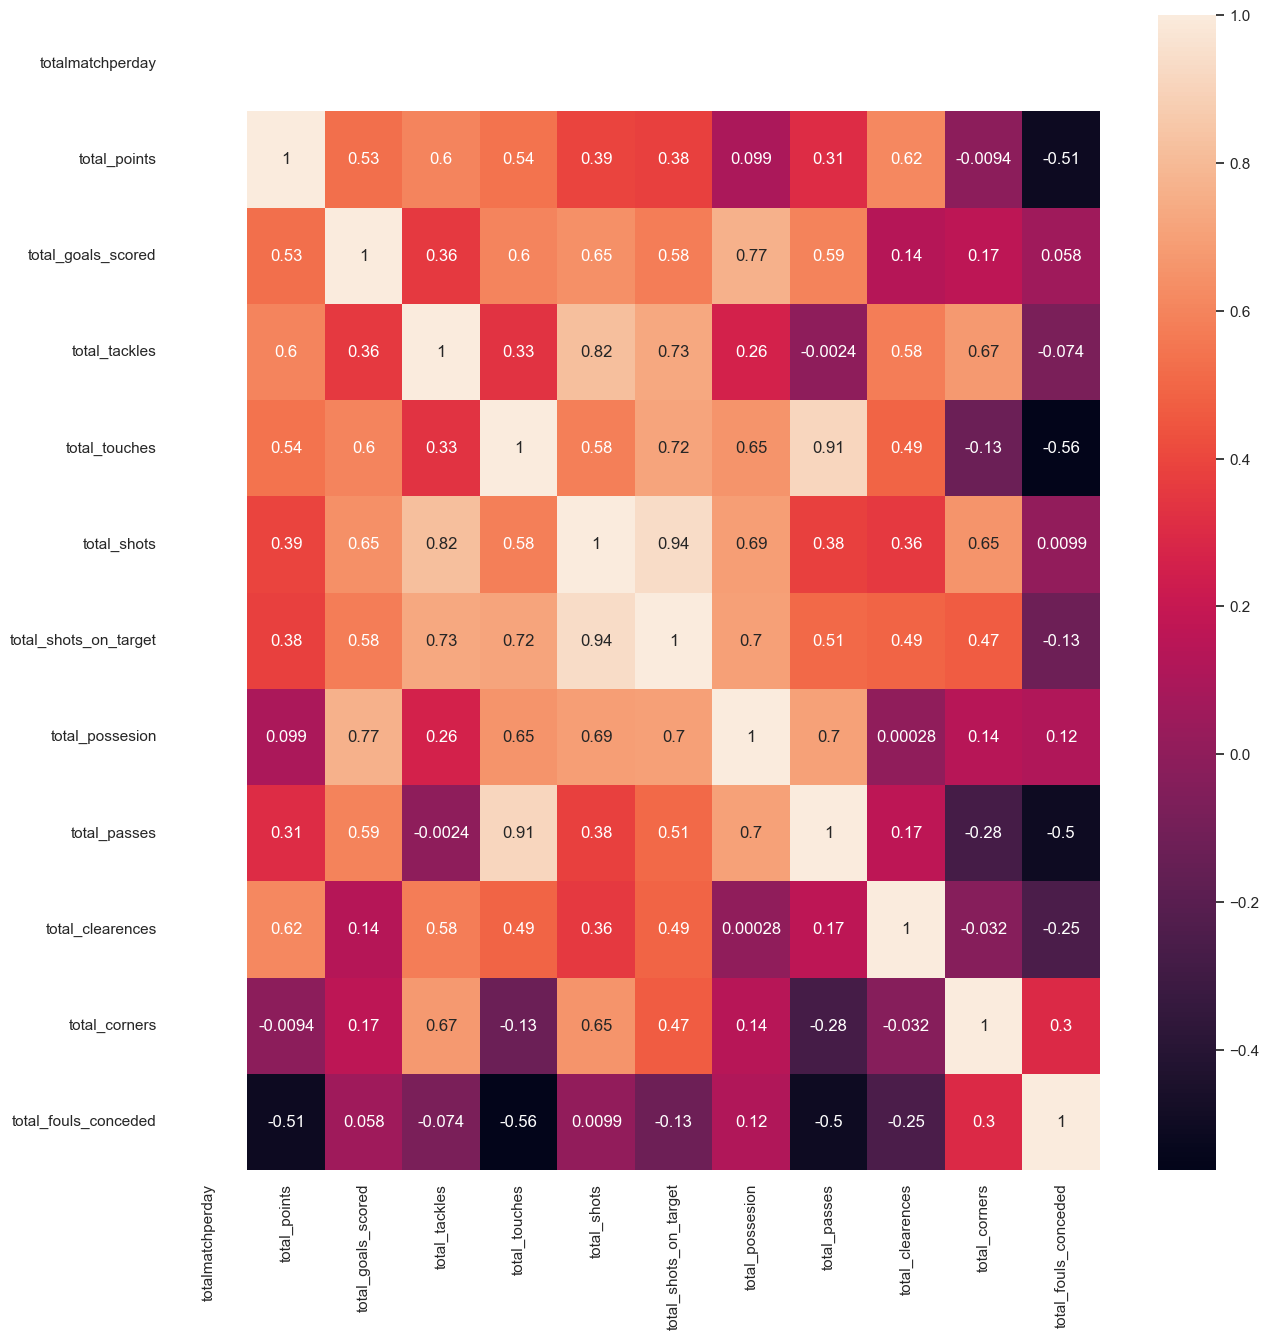

In [74]:
fig = plt.subplots(figsize=(15,15))
sns.heatmap(abc, annot=True,)

In [75]:
#according to this heat for arsenal performance in all season we can see that, 
# total points for arsenal in each season was too related to tackles, touches, goals scored and clearnces.

In [76]:
#charts for these relations:

In [77]:
Arsenal_charts_df

,totalmatchperday,total_points,total_goals_scored,total_tackles,total_touches,total_shots,total_shots_on_target,total_possesion,total_passes,total_clearences,total_corners,total_fouls_conceded
season,,,,,,,,,,,,
10/11,38,68,72,772.0,28629.0,654.0,238.0,2282.1,20150.0,1077.0,252.0,453.0
11/12,38,70,74,751.0,28348.0,637.0,236.0,2286.5,20613.0,766.0,262.0,407.0
12/13,38,73,72,748.0,28862.0,597.0,205.0,2210.3,21110.0,873.0,260.0,383.0
13/14,38,79,68,714.0,29825.0,523.0,213.0,2159.4,21561.0,1207.0,210.0,350.0
14/15,38,75,71,739.0,29045.0,610.0,227.0,2150.3,20527.0,1006.0,254.0,376.0
15/16,38,71,65,709.0,29337.0,571.0,211.0,2213.4,21249.0,849.0,227.0,350.0
16/17,38,75,77,673.0,28931.0,566.0,201.0,2230.9,21394.0,838.0,227.0,398.0
17/18,38,63,74,623.0,30635.0,594.0,234.0,2350.3,23524.0,829.0,225.0,383.0
18/19,38,70,73,609.0,28126.0,467.0,170.0,2220.6,20805.0,762.0,209.0,412.0


In [78]:

#sns.pairplot(piaring_Arsenal_charts_df)
#plt.suptitle('most related')
#plt.show()

In [79]:
#sns.scatterplot(data=df, x='x', y='y', size='z', marker='h', s=200, legend=False)
#plt.figure(figsize=(5, 5))
#sns.scatterplot(x='total_tackles',y='total_points' ,hue= 'season',size='total_touches',style='total_clearences' ,legend=False, data= Arsenal_charts_df)
#plt.xlabel('total_tackles')
#plt.ylabel('total_points')
#plt.title('Relationship between total_tackles, total_points, per season')
# plt.show()

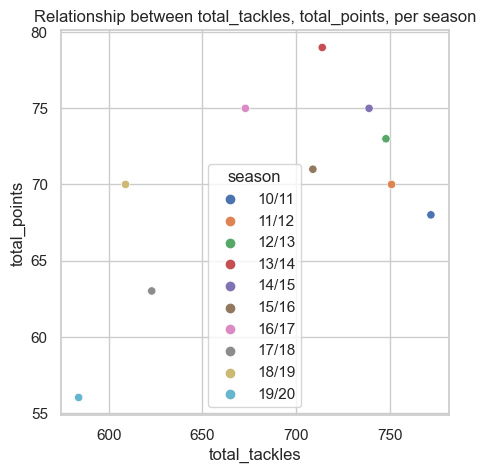

In [80]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='total_tackles',y='total_points' ,hue= 'season', data= Arsenal_charts_df)
plt.xlabel('total_tackles')
plt.ylabel('total_points')
plt.title('Relationship between total_tackles, total_points, per season')
plt.show()

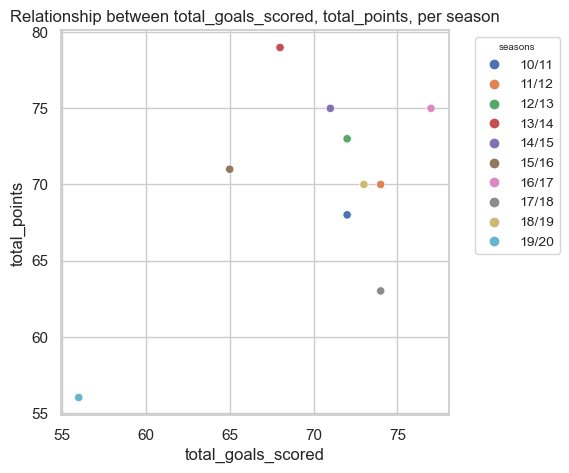

In [81]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='total_goals_scored',y='total_points' ,hue= 'season', data= Arsenal_charts_df)
plt.xlabel('total_goals_scored')
plt.ylabel('total_points')
plt.title('Relationship between total_goals_scored, total_points, per season')
legend = plt.legend(title='seasons',  bbox_to_anchor=(1.05, 1),fontsize=10)
legend.set_title('seasons', prop={'size': 7}) 
plt.show()

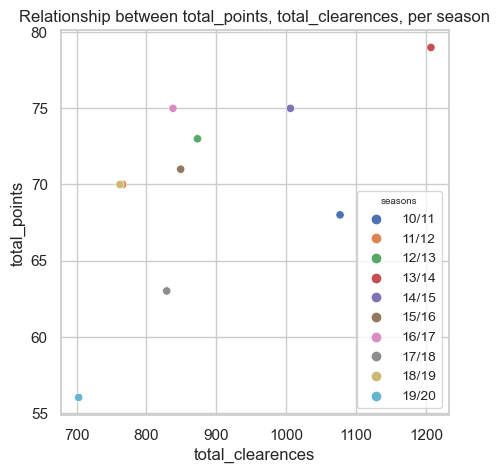

In [82]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='total_clearences',y='total_points' ,hue= 'season', data= Arsenal_charts_df)
plt.xlabel('total_clearences')
plt.ylabel('total_points')
plt.title('Relationship between total_points, total_clearences, per season')
legend = plt.legend(title='seasons',fontsize=10)
legend.set_title('seasons', prop={'size': 7}) 
plt.show()

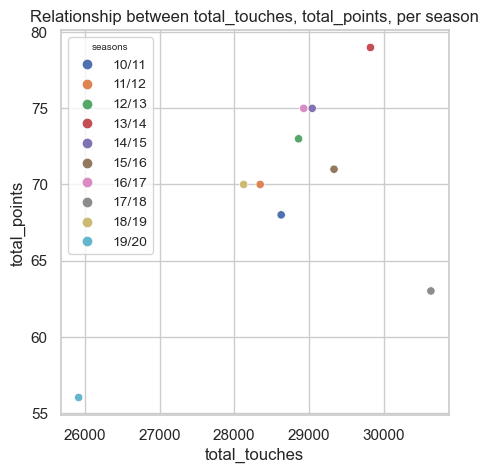

In [83]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='total_touches',y='total_points' ,hue= 'season', data= Arsenal_charts_df)
plt.xlabel('total_touches')
plt.ylabel('total_points')
plt.title('Relationship between total_touches, total_points, per season')
legend = plt.legend(title='seasons',fontsize=10)
legend.set_title('seasons', prop={'size': 7}) 
plt.show()

In [84]:
##charts about sub important relations:
['totalmatchperday',
 'total_points',
 'total_goals_scored',
 'total_tackles',
 'total_touches',
 'total_shots',
 'total_shots_on_target',
 'total_possesion',
 'total_passes',
 'total_clearences',
 'total_corners',
 'total_fouls_conceded']

['totalmatchperday',
 'total_points',
 'total_goals_scored',
 'total_tackles',
 'total_touches',
 'total_shots',
 'total_shots_on_target',
 'total_possesion',
 'total_passes',
 'total_clearences',
 'total_corners',
 'total_fouls_conceded']

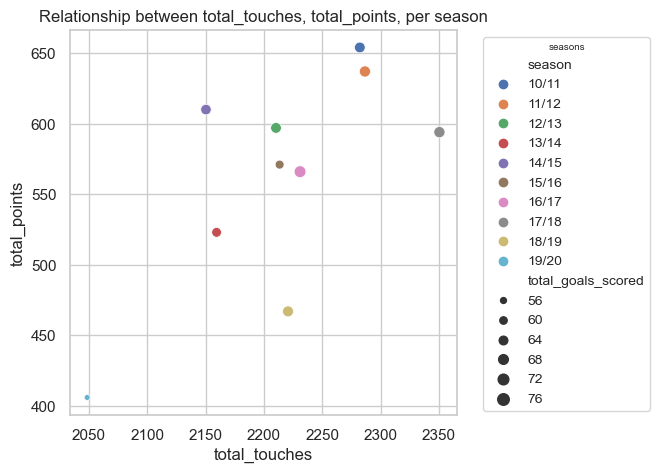

In [85]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='total_possesion',y='total_shots' ,size = 'total_goals_scored',hue= 'season', data= Arsenal_charts_df)
plt.xlabel('total_touches')
plt.ylabel('total_points')
plt.title('Relationship between total_touches, total_points, per season')
legend = plt.legend(title='seasons',  bbox_to_anchor=(1.05, 1),fontsize=10)
legend.set_title('seasons', prop={'size': 7}) 
plt.show()

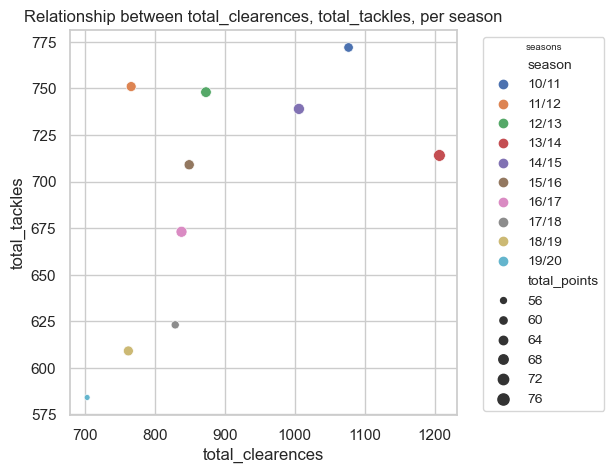

In [86]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='total_clearences',y='total_tackles' ,size = 'total_points',hue= 'season', data= Arsenal_charts_df)
plt.xlabel('total_clearences')
plt.ylabel('total_tackles')
plt.title('Relationship between total_clearences, total_tackles, per season')
legend = plt.legend(title='seasons',  bbox_to_anchor=(1.05, 1),fontsize=10)
legend.set_title('seasons', prop={'size': 7}) 
plt.show()

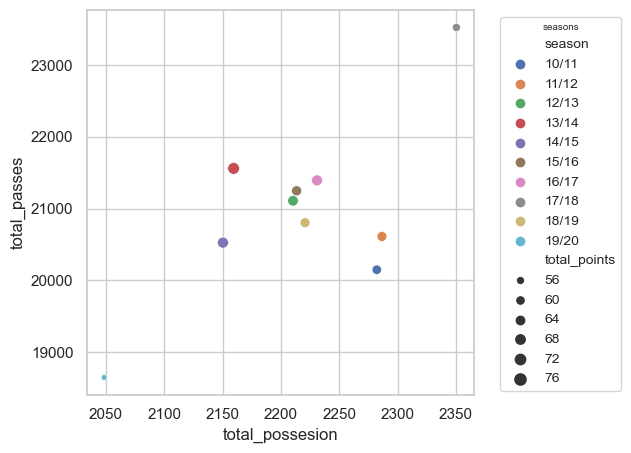

In [87]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='total_possesion',y='total_passes' ,size = 'total_points',hue= 'season', data= Arsenal_charts_df)
plt.xlabel('total_possesion')
plt.ylabel('total_passes')
#plt.title('Relationship between total_touches, total_points, per season')
legend = plt.legend(title='seasons',  bbox_to_anchor=(1.05, 1),fontsize=10)
legend.set_title('seasons', prop={'size': 7}) 
plt.show()
#,style='total_shots_on_target'

In [88]:
### teams performances:
allteam_charts

,team_name,totalmatchperday,total_points,total_goals_scored,total_tackles,total_touches,total_shots,total_shots_on_target,total_possesion,total_passes,total_clearences,total_corners,total_fouls_conceded
season,,,,,,,,,,,,,
10/11,Arsenal,38,68,72,772.0,28629.0,654.0,238.0,2282.1,20150.0,1077.0,252.0,453.0
10/11,Aston Villa,38,48,48,844.0,22681.0,506.0,165.0,1856.2,14611.0,1116.0,230.0,466.0
10/11,Birmingham City,38,39,37,668.0,21652.0,401.0,121.0,1812.2,14036.0,1261.0,150.0,435.0
10/11,Blackburn Rovers,38,43,46,748.0,19421.0,453.0,135.0,1573.7,11178.0,1521.0,173.0,498.0
10/11,Blackpool,38,39,55,780.0,23616.0,531.0,161.0,1887.9,15113.0,1616.0,183.0,440.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19/20,Southampton,38,52,51,706.0,23611.0,499.0,181.0,1862.4,15667.0,824.0,210.0,450.0
19/20,Tottenham Hotspur,38,59,61,665.0,26302.0,444.0,160.0,1980.6,18644.0,841.0,200.0,423.0
19/20,Watford,38,34,36,657.0,21331.0,424.0,122.0,1614.7,14067.0,822.0,167.0,481.0


In [89]:
at = all_df.sort_values(['season', 'total_points'], ascending=[True, False])

In [90]:
aaa = all_df['total_points'].head(20)
bbb = aaa.reset_index()
bbb

,season,team_name,total_points
0,17/18,Manchester City,100
1,19/20,Liverpool,99
2,18/19,Manchester City,98
3,18/19,Liverpool,97
4,16/17,Chelsea,93
5,11/12,Manchester City,89
6,11/12,Manchester United,89
7,12/13,Manchester United,89
8,14/15,Chelsea,87
9,13/14,Manchester City,86


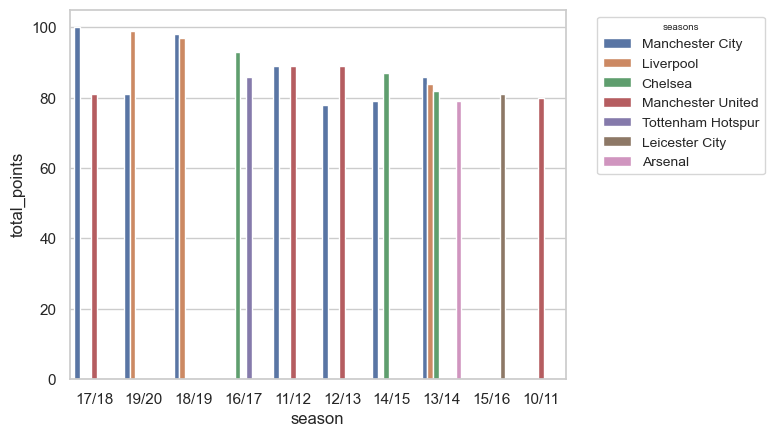

In [91]:
sns.barplot(data = bbb,x='season',y='total_points',hue='team_name')
#sns.lineplot
plt.xlabel('season')
plt.ylabel('total_points')
#plt.title('Relationship between total_touches, total_points, per season')
legend = plt.legend(title='seasons',  bbox_to_anchor=(1.05, 1),fontsize=10)
legend.set_title('seasons', prop={'size': 7}) 
plt.show()

In [92]:
#best season for arsenal is 13/14
#bet teams against arsenal are: city 17/18, liverpool 19/20, chelsea 16/17, man u 11/12, tottenham 16/17

In [93]:
at.reset_index()

,season,team_name,home_clearances,home_corners,home_fouls_conceded,home_offsides,home_passes,home_possession,home_red_cards,home_shots,...,total_goals_scored,total_tackles,total_touches,total_shots,total_shots_on_target,total_possesion,total_passes,total_clearences,total_corners,total_fouls_conceded
0,10/11,Manchester United,411.0,125.0,190.0,54.0,9660.0,1053.9,1.0,346.0,...,78,693.0,26671.0,618.0,212.0,2131.3,18870.0,1053.0,243.0,423.0
1,10/11,Manchester City,540.0,133.0,232.0,54.0,8741.0,992.7,3.0,306.0,...,60,826.0,25892.0,546.0,177.0,2017.1,17768.0,1206.0,222.0,486.0
2,10/11,Chelsea,355.0,136.0,212.0,52.0,9453.0,1094.1,1.0,379.0,...,69,769.0,27426.0,745.0,244.0,2216.4,19236.0,762.0,257.0,441.0
3,10/11,Arsenal,432.0,137.0,234.0,61.0,10316.0,1149.5,3.0,350.0,...,72,772.0,28629.0,654.0,238.0,2282.1,20150.0,1077.0,252.0,453.0
4,10/11,Tottenham Hotspur,639.0,156.0,190.0,32.0,8401.0,1041.9,1.0,384.0,...,55,754.0,25438.0,657.0,191.0,2048.9,16791.0,1363.0,256.0,398.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,19/20,West Ham United,330.0,96.0,186.0,30.0,7725.0,863.0,1.0,221.0,...,49,696.0,22359.0,417.0,163.0,1672.2,15101.0,752.0,190.0,387.0
196,19/20,Aston Villa,381.0,111.0,231.0,32.0,7176.0,857.8,0.0,247.0,...,41,523.0,21368.0,457.0,150.0,1665.2,13835.0,840.0,200.0,451.0
197,19/20,AFC Bournemouth,449.0,102.0,172.0,35.0,7280.0,830.4,2.0,199.0,...,40,507.0,22199.0,389.0,122.0,1669.5,14694.0,926.0,194.0,369.0
198,19/20,Watford,367.0,82.0,258.0,34.0,6879.0,810.3,2.0,244.0,...,36,657.0,21331.0,424.0,122.0,1614.7,14067.0,822.0,167.0,481.0


In [94]:
at.columns.tolist()

['home_clearances',
 'home_corners',
 'home_fouls_conceded',
 'home_offsides',
 'home_passes',
 'home_possession',
 'home_red_cards',
 'home_shots',
 'home_shots_on_target',
 'home_tackles',
 'home_touches',
 'home_yellow_cards',
 'goal_home_ft',
 'goal_home_ht',
 'clearances_avg_home',
 'corners_avg_home',
 'fouls_conceded_avg_home',
 'offsides_avg_home',
 'passes_avg_home',
 'possession_avg_home',
 'red_cards_avg_home',
 'shots_avg_home',
 'shots_on_target_avg_home',
 'tackles_avg_home',
 'touches_avg_home',
 'yellow_cards_avg_home',
 'goals_scored_ft_avg_home',
 'goals_conced_ft_avg_home',
 'sg_match_ft_acum_home',
 'goals_scored_ht_avg_home',
 'goals_conced_ht_avg_home',
 'sg_match_ht_acum_home',
 'performance_acum_home',
 'home_Goals',
 'points_home',
 'home_matchperday',
 'away_clearances',
 'away_corners',
 'away_fouls_conceded',
 'away_offsides',
 'away_passes',
 'away_possession',
 'away_red_cards',
 'away_shots',
 'away_shots_on_target',
 'away_tackles',
 'away_touches',
 'aw

In [95]:
col_to_drop = ['home_clearances',
 'home_corners',
 'home_fouls_conceded',
 'home_offsides',
 'home_passes',
 'home_possession',
 'home_red_cards',
 'home_shots',
 'home_shots_on_target',
 'home_tackles',
 'home_touches',
 'home_yellow_cards',
 'goal_home_ft',
 'goal_home_ht',
 'clearances_avg_home',
 'corners_avg_home',
 'fouls_conceded_avg_home',
 'offsides_avg_home',
 'passes_avg_home',
 'possession_avg_home',
 'red_cards_avg_home',
 'shots_avg_home',
 'shots_on_target_avg_home',
 'tackles_avg_home',
 'touches_avg_home',
 'yellow_cards_avg_home',
 'goals_scored_ft_avg_home',
 'goals_conced_ft_avg_home',
 'sg_match_ft_acum_home',
 'goals_scored_ht_avg_home',
 'goals_conced_ht_avg_home',
 'sg_match_ht_acum_home',
 'performance_acum_home',
 'home_Goals',
 'points_home',
 'home_matchperday',
 'away_clearances',
 'away_corners',
 'away_fouls_conceded',
 'away_offsides',
 'away_passes',
 'away_possession',
 'away_red_cards',
 'away_shots',
 'away_shots_on_target',
 'away_tackles',
 'away_touches',
 'away_yellow_cards',
 'goal_away_ft',
 'goal_away_ht',
 'clearances_avg_away',
 'corners_avg_away',
 'fouls_conceded_avg_away',
 'offsides_avg_away',
 'passes_avg_away',
 'possession_avg_away',
 'red_cards_avg_away',
 'shots_avg_away',
 'shots_on_target_avg_away',
 'tackles_avg_away',
 'touches_avg_away',
 'yellow_cards_avg_away',
 'goals_scored_ft_avg_away',
 'goals_conced_ft_avg_away',
 'sg_match_ft_acum_away',
 'goals_scored_ht_avg_away',
 'goals_conced_ht_avg_away',
 'sg_match_ht_acum_away',
 'performance_acum_away',
 'away_Goals',
 'points_away',
 'away_matchperday',]

In [96]:
atd = at.drop(col_to_drop, axis=1)
atdri = atd.reset_index()

In [97]:
atdri

,season,team_name,totalmatchperday,total_points,total_goals_scored,total_tackles,total_touches,total_shots,total_shots_on_target,total_possesion,total_passes,total_clearences,total_corners,total_fouls_conceded
0,10/11,Manchester United,38,80,78,693.0,26671.0,618.0,212.0,2131.3,18870.0,1053.0,243.0,423.0
1,10/11,Manchester City,38,71,60,826.0,25892.0,546.0,177.0,2017.1,17768.0,1206.0,222.0,486.0
2,10/11,Chelsea,38,71,69,769.0,27426.0,745.0,244.0,2216.4,19236.0,762.0,257.0,441.0
3,10/11,Arsenal,38,68,72,772.0,28629.0,654.0,238.0,2282.1,20150.0,1077.0,252.0,453.0
4,10/11,Tottenham Hotspur,38,62,55,754.0,25438.0,657.0,191.0,2048.9,16791.0,1363.0,256.0,398.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,19/20,West Ham United,38,39,49,696.0,22359.0,417.0,163.0,1672.2,15101.0,752.0,190.0,387.0
196,19/20,Aston Villa,38,35,41,523.0,21368.0,457.0,150.0,1665.2,13835.0,840.0,200.0,451.0
197,19/20,AFC Bournemouth,38,34,40,507.0,22199.0,389.0,122.0,1669.5,14694.0,926.0,194.0,369.0
198,19/20,Watford,38,34,36,657.0,21331.0,424.0,122.0,1614.7,14067.0,822.0,167.0,481.0


In [98]:
#bet teams against arsenal are: city 17/18, liverpool 19/20, chelsea 16/17, man u 11/12, tottenham 16/17

#best season for arsenal is 13/14

#worst Arsenal is

In [99]:
b_mcity = atdri[(atdri['season'] == '17/18')]
best_mcity = b_mcity[(b_mcity['team_name'] == 'Manchester City')]

In [100]:
best_mcity

,season,team_name,totalmatchperday,total_points,total_goals_scored,total_tackles,total_touches,total_shots,total_shots_on_target,total_possesion,total_passes,total_clearences,total_corners,total_fouls_conceded
140,17/18,Manchester City,38,100,106,563.0,35130.0,665.0,265.0,2726.5,28241.0,588.0,284.0,344.0


In [101]:
b_liverpool = atdri[(atdri['season'] == '19/20')]
best_liverpool = b_liverpool[(b_liverpool['team_name'] == 'Liverpool')]

In [102]:
best_liverpool

,season,team_name,totalmatchperday,total_points,total_goals_scored,total_tackles,total_touches,total_shots,total_shots_on_target,total_possesion,total_passes,total_clearences,total_corners,total_fouls_conceded
180,19/20,Liverpool,38,99,85,550.0,30987.0,591.0,231.0,2406.3,23872.0,587.0,257.0,331.0


In [103]:
b_Chelsea = atdri[(atdri['season'] == '16/17')]
best_Chelsea = b_Chelsea[(b_Chelsea['team_name'] == 'Chelsea')]

In [104]:
best_Chelsea

,season,team_name,totalmatchperday,total_points,total_goals_scored,total_tackles,total_touches,total_shots,total_shots_on_target,total_possesion,total_passes,total_clearences,total_corners,total_fouls_conceded
120,16/17,Chelsea,38,93,85,652.0,27658.0,580.0,204.0,2088.2,20125.0,839.0,218.0,395.0


In [105]:
b_manu = atdri[(atdri['season'] == '11/12')]
best_manu = b_manu[(b_manu['team_name'] == 'Manchester United')]

In [106]:
best_manu

,season,team_name,totalmatchperday,total_points,total_goals_scored,total_tackles,total_touches,total_shots,total_shots_on_target,total_possesion,total_passes,total_clearences,total_corners,total_fouls_conceded
21,11/12,Manchester United,38,89,89,803.0,28118.0,646.0,243.0,2194.2,20193.0,1165.0,279.0,389.0


In [107]:
b_tth = atdri[(atdri['season'] == '16/17')]
best_tth = b_tth[(b_tth['team_name'] == 'Tottenham Hotspur')]

In [108]:
best_tth

,season,team_name,totalmatchperday,total_points,total_goals_scored,total_tackles,total_touches,total_shots,total_shots_on_target,total_possesion,total_passes,total_clearences,total_corners,total_fouls_conceded
121,16/17,Tottenham Hotspur,38,86,86,661.0,28150.0,669.0,257.0,2298.2,20150.0,1003.0,273.0,432.0


In [109]:
b_aresnal = atdri[(atdri['season'] == '13/14')]
best_aresnal = b_aresnal[(b_aresnal['team_name'] == 'Arsenal')]

In [110]:
best_aresnal

,season,team_name,totalmatchperday,total_points,total_goals_scored,total_tackles,total_touches,total_shots,total_shots_on_target,total_possesion,total_passes,total_clearences,total_corners,total_fouls_conceded
63,13/14,Arsenal,38,79,68,714.0,29825.0,523.0,213.0,2159.4,21561.0,1207.0,210.0,350.0


In [111]:
#worst arsenal is 19/20
w_aresnal = atdri[(atdri['season'] == '19/20')]
worst_aresnal = w_aresnal[(w_aresnal['team_name'] == 'Arsenal')]

In [112]:
worst_aresnal

,season,team_name,totalmatchperday,total_points,total_goals_scored,total_tackles,total_touches,total_shots,total_shots_on_target,total_possesion,total_passes,total_clearences,total_corners,total_fouls_conceded
187,19/20,Arsenal,38,56,56,584.0,25916.0,406.0,151.0,2048.5,18649.0,703.0,231.0,421.0


In [113]:
Best_Teams_vs_Arsenal = pd.concat([best_mcity,best_liverpool,best_Chelsea,best_manu,best_tth,best_aresnal],axis=0)

In [114]:
Best_Teams_vs_Arsenal.drop('totalmatchperday', axis=1, inplace=True)

In [115]:
Best_Teams_vs_Arsenal

,season,team_name,total_points,total_goals_scored,total_tackles,total_touches,total_shots,total_shots_on_target,total_possesion,total_passes,total_clearences,total_corners,total_fouls_conceded
140,17/18,Manchester City,100,106,563.0,35130.0,665.0,265.0,2726.5,28241.0,588.0,284.0,344.0
180,19/20,Liverpool,99,85,550.0,30987.0,591.0,231.0,2406.3,23872.0,587.0,257.0,331.0
120,16/17,Chelsea,93,85,652.0,27658.0,580.0,204.0,2088.2,20125.0,839.0,218.0,395.0
21,11/12,Manchester United,89,89,803.0,28118.0,646.0,243.0,2194.2,20193.0,1165.0,279.0,389.0
121,16/17,Tottenham Hotspur,86,86,661.0,28150.0,669.0,257.0,2298.2,20150.0,1003.0,273.0,432.0
63,13/14,Arsenal,79,68,714.0,29825.0,523.0,213.0,2159.4,21561.0,1207.0,210.0,350.0


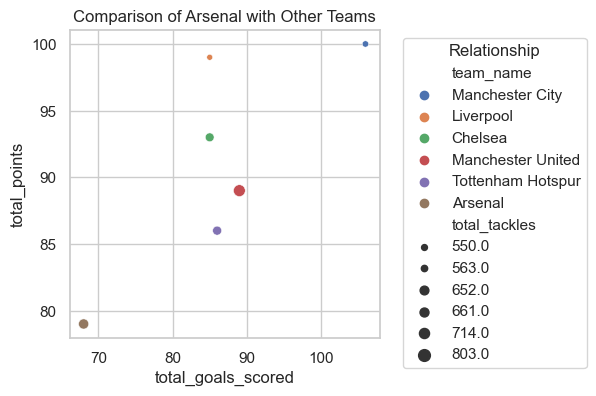

In [116]:
sns.set(style="whitegrid")
plt.figure(figsize=(4,4))
sns.scatterplot(x='total_goals_scored' ,y="total_points", hue="team_name",size='total_tackles', data=Best_Teams_vs_Arsenal)
plt.xlabel('total_goals_scored')
plt.ylabel('total_points')
plt.title('Comparison of Arsenal with Other Teams')
plt.legend(title='Relationship',  bbox_to_anchor=(1.05, 1))
plt.show()

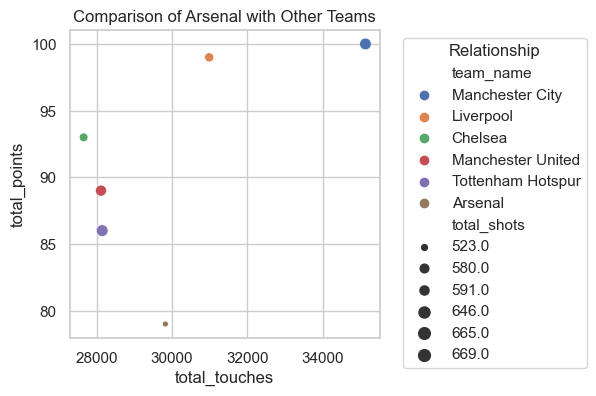

In [117]:
sns.set(style="whitegrid")
plt.figure(figsize=(4,4))
sns.scatterplot(x='total_touches' ,y="total_points", hue="team_name",size='total_shots', data=Best_Teams_vs_Arsenal)
plt.xlabel('total_touches')
plt.ylabel('total_points')
plt.title('Comparison of Arsenal with Other Teams')
plt.legend(title='Relationship',  bbox_to_anchor=(1.05, 1))
plt.show()

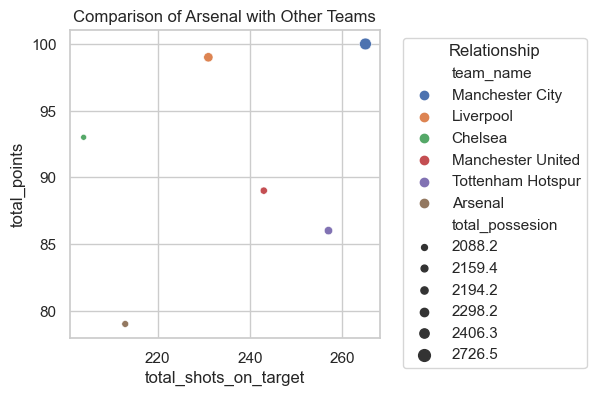

In [118]:
sns.set(style="whitegrid")
plt.figure(figsize=(4,4))
sns.scatterplot(x='total_shots_on_target' ,y="total_points", hue="team_name",size='total_possesion', data=Best_Teams_vs_Arsenal)
plt.xlabel('total_shots_on_target')
plt.ylabel('total_points')
plt.title('Comparison of Arsenal with Other Teams')
plt.legend(title='Relationship',  bbox_to_anchor=(1.05, 1))
plt.show()

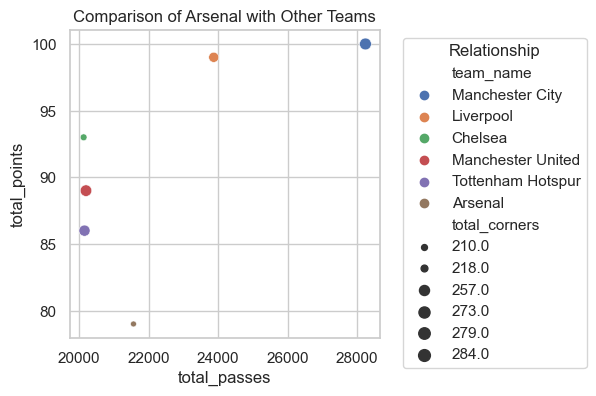

In [119]:
sns.set(style="whitegrid")
plt.figure(figsize=(4,4))
sns.scatterplot(x='total_passes' ,y="total_points", hue="team_name",size='total_corners', data=Best_Teams_vs_Arsenal)
plt.xlabel('total_passes')
plt.ylabel('total_points')
plt.title('Comparison of Arsenal with Other Teams')
plt.legend(title='Relationship',  bbox_to_anchor=(1.05, 1))
plt.show()

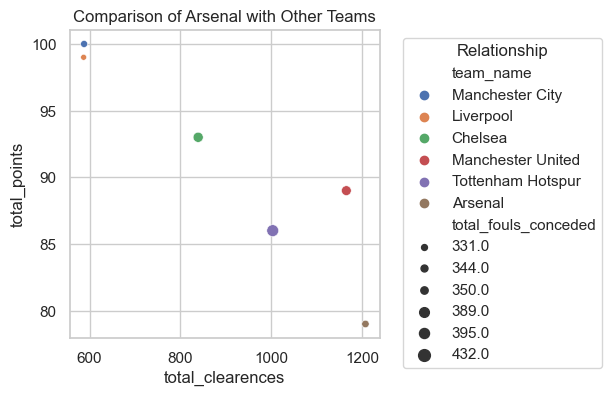

In [120]:
sns.set(style="whitegrid")
plt.figure(figsize=(4,4))
sns.scatterplot(x='total_clearences' ,y="total_points", hue="team_name",size='total_fouls_conceded', data=Best_Teams_vs_Arsenal)
plt.xlabel('total_clearences')
plt.ylabel('total_points')
plt.title('Comparison of Arsenal with Other Teams')
plt.legend(title='Relationship',  bbox_to_anchor=(1.05, 1))
plt.show()

In [121]:
Worst_Arsenal_vs_Best_Arsenal = pd.concat([best_aresnal,worst_aresnal],axis=0)
Worst_Arsenal_vs_Best_Arsenal.drop('totalmatchperday', axis=1, inplace=True)

In [122]:
#worst arsenal is 19/20

Worst_Arsenal_vs_Best_Arsenal

,season,team_name,total_points,total_goals_scored,total_tackles,total_touches,total_shots,total_shots_on_target,total_possesion,total_passes,total_clearences,total_corners,total_fouls_conceded
63,13/14,Arsenal,79,68,714.0,29825.0,523.0,213.0,2159.4,21561.0,1207.0,210.0,350.0
187,19/20,Arsenal,56,56,584.0,25916.0,406.0,151.0,2048.5,18649.0,703.0,231.0,421.0


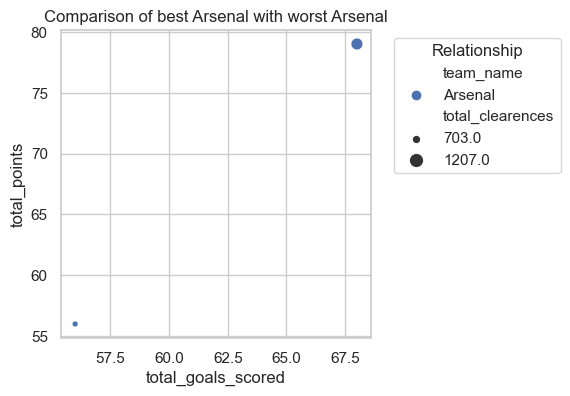

In [123]:
sns.set(style="whitegrid")
plt.figure(figsize=(4,4))
sns.scatterplot(x='total_goals_scored' ,y="total_points", hue="team_name",size='total_clearences', data=Worst_Arsenal_vs_Best_Arsenal)
plt.xlabel('total_goals_scored')
plt.ylabel('total_points')
plt.title('Comparison of best Arsenal with worst Arsenal')
plt.legend(title='Relationship',  bbox_to_anchor=(1.05, 1))
plt.show()

In [124]:
#power bi report creation from the total data concept to show how far Arsenal is from the best place
#ans so far arsenal has to improve their data thorugh getting good players in each position who can fill up the shortage in these points
#also it is necessary to have the players ratings in each match in each season to compare that too.
#and also necessary to have the data for the ticket sales which will indicates the satisfication from the team per season.


In [125]:
Best_Teams_vs_Arsenal.to_csv('Premium.L_Teams_charts_of_totals.csv', index=False)
file_path = '/Users/wolf/Desktop/Best_Teams_vs_Arsenal.csv'  
# Replace with your desktop path
Best_Teams_vs_Arsenal.to_csv(file_path, index=False) 

# machine learning process:

In [126]:
# create data = x
# target = y
#get_dummies for Target col

In [127]:
status_dummies = pd.get_dummies(Arsenal['status'])
status_dummies

,d,l,w
246,1,0,0
124,0,0,1
174,0,0,1
31,0,0,1
91,1,0,0
...,...,...,...
3917,0,1,0
3940,0,0,1
3959,0,1,0
3980,0,0,1


In [128]:
ML_Arsenal = pd.concat([Arsenal,status_dummies], axis=1)
ML_Arsenal

,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,home_fouls_conceded,home_offsides,...,away_Goals,GoalDifference,points_home,points_away,matchperday,points_home_new,status,d,l,w
246,10/11,2010-08-15,Liverpool,Arsenal,1-1,0-0,33.0,9.0,15.0,5.0,...,1,0,1,1,1,1.0,d,1,0,0
124,10/11,2010-08-21,Arsenal,Blackpool,6-0,3-0,13.0,8.0,10.0,4.0,...,0,6,3,0,1,3.0,w,0,0,1
174,10/11,2010-08-28,Blackburn Rovers,Arsenal,1-2,1-1,32.0,4.0,9.0,5.0,...,2,-1,0,3,1,0.0,w,0,0,1
31,10/11,2010-09-11,Arsenal,Bolton Wanderers,4-1,1-1,34.0,9.0,11.0,5.0,...,1,3,3,0,1,3.0,w,0,0,1
91,10/11,2010-09-18,Sunderland,Arsenal,1-1,0-1,18.0,11.0,12.0,2.0,...,1,0,1,1,1,1.0,d,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3917,20/21,2021-02-06,Aston Villa,Arsenal,1-0,1-0,27.0,3.0,12.0,1.0,...,0,1,3,0,1,3.0,l,0,1,0
3940,20/21,2021-02-14,Arsenal,Leeds United,4-2,3-0,15.0,4.0,8.0,2.0,...,2,2,3,0,1,3.0,w,0,0,1
3959,20/21,2021-02-21,Arsenal,Manchester City,0-1,0-1,12.0,1.0,11.0,1.0,...,1,-1,0,3,1,0.0,l,0,1,0
3980,20/21,2021-02-28,Leicester City,Arsenal,1-3,1-2,15.0,2.0,15.0,0.0,...,3,-2,0,3,1,0.0,w,0,0,1


In [129]:
Totals = ML_Arsenal.groupby(['season'])[['w', 'd', 'l']].sum()
Totals

,w,d,l
season,,,
10/11,19,11,8
11/12,21,7,10
12/13,21,10,7
13/14,24,7,7
14/15,22,9,7
15/16,20,11,7
16/17,23,6,9
17/18,19,6,13
18/19,21,7,10


In [130]:
ML_Arsenal.columns.tolist()

['season',
 'date',
 'home_team',
 'away_team',
 'result_full',
 'result_ht',
 'home_clearances',
 'home_corners',
 'home_fouls_conceded',
 'home_offsides',
 'home_passes',
 'home_possession',
 'home_red_cards',
 'home_shots',
 'home_shots_on_target',
 'home_tackles',
 'home_touches',
 'home_yellow_cards',
 'away_clearances',
 'away_corners',
 'away_fouls_conceded',
 'away_offsides',
 'away_passes',
 'away_possession',
 'away_red_cards',
 'away_shots',
 'away_shots_on_target',
 'away_tackles',
 'away_touches',
 'away_yellow_cards',
 'goal_home_ft',
 'goal_away_ft',
 'sg_match_ft',
 'goal_home_ht',
 'goal_away_ht',
 'sg_match_ht',
 'clearances_avg_H',
 'corners_avg_H',
 'fouls_conceded_avg_H',
 'offsides_avg_H',
 'passes_avg_H',
 'possession_avg_H',
 'red_cards_avg_H',
 'shots_avg_H',
 'shots_on_target_avg_H',
 'tackles_avg_H',
 'touches_avg_H',
 'yellow_cards_avg_H',
 'goals_scored_ft_avg_H',
 'goals_conced_ft_avg_H',
 'sg_match_ft_acum_H',
 'goals_scored_ht_avg_H',
 'goals_conced_ht_a

In [131]:
# List of column names to drop
columns_to_drop = ['clearances_avg_H','result_ht','sg_match_ht',
 'corners_avg_H',
 'fouls_conceded_avg_H',
 'offsides_avg_H',
 'passes_avg_H',
 'possession_avg_H',
 'red_cards_avg_H',
 'shots_avg_H',
 'shots_on_target_avg_H',
 'tackles_avg_H',
 'touches_avg_H',
 'yellow_cards_avg_H',
 'goals_scored_ft_avg_H',
 'goals_conced_ft_avg_H',
 'goals_scored_ht_avg_H',
 'goals_conced_ht_avg_H',
 'sg_match_ht_acum_H', 'points_home_new','result_full','season','date','home_team','away_team',
 'GoalDifference','status','d','l',
]

# Drop multiple columns
ML_Arsenal = ML_Arsenal.drop(columns_to_drop, axis=1)

In [132]:
ML_Arsenal.head()

,home_clearances,home_corners,home_fouls_conceded,home_offsides,home_passes,home_possession,home_red_cards,home_shots,home_shots_on_target,home_tackles,...,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away,home_Goals,away_Goals,points_home,points_away,matchperday,w
246,33.0,9.0,15.0,5.0,303.0,36.7,1.0,8.0,4.0,30.0,...,NaN,NaN,NaN,NaN,1,1,1,1,1,0
124,13.0,8.0,10.0,4.0,581.0,53.3,0.0,30.0,12.0,14.0,...,3.00,0.00,3.0,100.0,6,0,3,0,1,1
174,32.0,4.0,9.0,5.0,281.0,35.3,0.0,15.0,3.0,26.0,...,1.50,0.00,3.0,66.7,1,2,0,3,1,1
31,34.0,9.0,11.0,5.0,571.0,64.3,0.0,22.0,11.0,18.0,...,0.00,0.33,-1.0,55.6,4,1,3,0,1,1
91,18.0,11.0,12.0,2.0,407.0,53.5,0.0,19.0,4.0,28.0,...,1.25,0.50,3.0,83.3,1,1,1,1,1,0


In [133]:
X = ML_Arsenal.drop(columns=['w'],axis=1)
y = ML_Arsenal.iloc[:,-1:]
X

,home_clearances,home_corners,home_fouls_conceded,home_offsides,home_passes,home_possession,home_red_cards,home_shots,home_shots_on_target,home_tackles,...,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away,home_Goals,away_Goals,points_home,points_away,matchperday
246,33.0,9.0,15.0,5.0,303.0,36.7,1.0,8.0,4.0,30.0,...,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1
124,13.0,8.0,10.0,4.0,581.0,53.3,0.0,30.0,12.0,14.0,...,4.0,3.00,0.00,3.0,100.0,6,0,3,0,1
174,32.0,4.0,9.0,5.0,281.0,35.3,0.0,15.0,3.0,26.0,...,6.0,1.50,0.00,3.0,66.7,1,2,0,3,1
31,34.0,9.0,11.0,5.0,571.0,64.3,0.0,22.0,11.0,18.0,...,2.0,0.00,0.33,-1.0,55.6,4,1,3,0,1
91,18.0,11.0,12.0,2.0,407.0,53.5,0.0,19.0,4.0,28.0,...,10.0,1.25,0.50,3.0,83.3,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3917,27.0,3.0,12.0,1.0,316.0,33.6,0.0,12.0,8.0,18.0,...,5.0,0.55,0.64,-2.0,47.0,1,0,3,0,1
3940,15.0,4.0,8.0,2.0,423.0,45.9,0.0,13.0,5.0,5.0,...,0.0,0.77,1.05,-6.0,48.5,4,2,3,0,1
3959,12.0,1.0,11.0,1.0,479.0,45.0,0.0,7.0,1.0,8.0,...,34.0,1.21,0.25,23.0,77.8,0,1,0,3,1
3980,15.0,2.0,15.0,0.0,408.0,44.2,0.0,8.0,3.0,21.0,...,5.0,0.60,0.64,-1.0,45.3,1,3,0,3,1


In [134]:
X.fillna(value = 0, axis=0, inplace = True)

In [174]:
X.isna().sum()

home_clearances        0
home_corners           0
home_fouls_conceded    0
home_offsides          0
home_passes            0
                      ..
home_Goals             0
away_Goals             0
points_home            0
points_away            0
matchperday            0
Length: 93, dtype: int64

In [177]:
X

,home_clearances,home_corners,home_fouls_conceded,home_offsides,home_passes,home_possession,home_red_cards,home_shots,home_shots_on_target,home_tackles,...,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away,home_Goals,away_Goals,points_home,points_away,matchperday
246,33.0,9.0,15.0,5.0,303.0,36.7,1.0,8.0,4.0,30.0,...,0.0,0.00,0.00,0.0,0.0,1,1,1,1,1
124,13.0,8.0,10.0,4.0,581.0,53.3,0.0,30.0,12.0,14.0,...,4.0,3.00,0.00,3.0,100.0,6,0,3,0,1
174,32.0,4.0,9.0,5.0,281.0,35.3,0.0,15.0,3.0,26.0,...,6.0,1.50,0.00,3.0,66.7,1,2,0,3,1
31,34.0,9.0,11.0,5.0,571.0,64.3,0.0,22.0,11.0,18.0,...,2.0,0.00,0.33,-1.0,55.6,4,1,3,0,1
91,18.0,11.0,12.0,2.0,407.0,53.5,0.0,19.0,4.0,28.0,...,10.0,1.25,0.50,3.0,83.3,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3917,27.0,3.0,12.0,1.0,316.0,33.6,0.0,12.0,8.0,18.0,...,5.0,0.55,0.64,-2.0,47.0,1,0,3,0,1
3940,15.0,4.0,8.0,2.0,423.0,45.9,0.0,13.0,5.0,5.0,...,0.0,0.77,1.05,-6.0,48.5,4,2,3,0,1
3959,12.0,1.0,11.0,1.0,479.0,45.0,0.0,7.0,1.0,8.0,...,34.0,1.21,0.25,23.0,77.8,0,1,0,3,1
3980,15.0,2.0,15.0,0.0,408.0,44.2,0.0,8.0,3.0,21.0,...,5.0,0.60,0.64,-1.0,45.3,1,3,0,3,1


In [169]:
y.isna().sum()

w    0
dtype: int64

In [144]:
# train model & sc data 

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [146]:
sc = StandardScaler()

In [151]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled  = sc.fit_transform(X_test)

In [152]:
#create the algo
#test the effeiciency and test the best algorithm!

In [153]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [154]:
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

# Predict using the trained SVM model
y_pred_svm = svm.predict(X_test_scaled)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.4878048780487805


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [156]:
classification_report(y_test, y_pred_svm)
report = classification_report(y_test, y_pred_svm)
# Print the classification report

print(report)

              precision    recall  f1-score   support

           0       0.47      1.00      0.64        38
           1       1.00      0.05      0.09        44

    accuracy                           0.49        82
   macro avg       0.74      0.52      0.37        82
weighted avg       0.76      0.49      0.35        82



In [157]:
# Define the hyperparameter grid
param_grid = { 
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': [0.001, 0.1, 0.5]
}

# Create an SVM classifier
svm = SVC()

# Perform hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Train the SVM model with the best hyperparameters
svm_best = SVC(**best_params)
svm_best.fit(X_train_scaled, y_train)

# Predict using the trained SVM model
y_pred_best = svm_best.predict(X_test_scaled)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred_best)
print("Accuracy:", accuracy)
print('best_params',best_params)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Accuracy: 0.7560975609756098
best_params {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [159]:
classification_report(y_test, y_pred_best)
report = classification_report(y_test, y_pred_best)
# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        38
           1       0.77      0.77      0.77        44

    accuracy                           0.76        82
   macro avg       0.75      0.75      0.75        82
weighted avg       0.76      0.76      0.76        82



In [160]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

# Create a Linear Regression model
lr = LogisticRegression()


# Train the Linear Regression model
lr.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate the performance of the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error:", mse)

accuracy = lr.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test, y_pred_lr))

Mean Squared Error: 0.2804878048780488
Accuracy: 0.7195121951219512
[[27 11]
 [12 32]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [163]:
lr = LogisticRegression(random_state=123) 
parametres = {'C': np.linspace(0.05, 1, 20), 
              'penalty' : ['l1', 'l2', 'elasticnet', 'none'], 
              'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_lr = GridSearchCV(estimator=lr, param_grid=parametres)


grid_lr.fit(X_train_scaled, y_train)
print("Best Parameters : {}".format(grid_lr.best_params_))
print("score of lr : {}".format(grid_lr.score(X_train_scaled, y_train)))

y_pred_lr_best = grid_lr.predict(X_test_scaled) 
accuracy = grid_lr.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test, y_pred_lr_best))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/pyth

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/pyth

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='n

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/pyth

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='n

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/pyth

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/pyth

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/pyth

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/pyth

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/pyth

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/pyth

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/pyth

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/pyth

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/pyth

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='n

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='n

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was 

Best Parameters : {'C': 0.25, 'penalty': 'l1', 'solver': 'liblinear'}
score of lr : 0.88
Accuracy: 0.7926829268292683
[[30  8]
 [ 9 35]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
900 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-------------

In [164]:
classification_report(y_test, y_pred_lr_best)
report = classification_report(y_test, y_pred_lr_best)
# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        38
           1       0.81      0.80      0.80        44

    accuracy                           0.79        82
   macro avg       0.79      0.79      0.79        82
weighted avg       0.79      0.79      0.79        82



# Create a KNeighborsRegressor model


In [167]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled,y_train)
# Make predictions on the testing data
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the performance of the model using Mean Squared Error (MSE)
mse3 = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error:", mse3)


accuracy = knn.score(y_test, y_pred_knn)
print("Accuracy:", accuracy)


Mean Squared Error: 0.13463414634146345


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


ValueError: X has 1 features, but KNeighborsRegressor is expecting 93 features as input.

In [168]:
classification_report(y_test, y_pred_knn)
report = classification_report(y_test, y_pred_knn)
# Print the classification report
print(report)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
#create reports to show the analysis work. to use its concepts in power bi, and the report.

In [ ]:
####